## 00. Table of Contents

1. Import Libraries
2. Import Data
3. Verify Data
4. Data Prep
5. Data Analysis

## 01. Import Libraries

In [1]:
# Import coding libraries.
import pandas as pd
import numpy as np
import os

# Import visualization libraries.
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import scipy

# Confirm execution.
print(f'Import libraries completed')

Import libraries completed


In [118]:
# Create a custom function that will turn a normalized crosstab into a stacked percentage bar chart.
def create_stacked_bar_chart(crosstab, title='TITLE', y_label='Percentages', x_label='X_CATEGORIES', legend_title='Y_CATEGORIES', colormap='tab10', width=6.4, height=4.8):

		# Verify crosstab DataFrame
    if not isinstance(crosstab, pd.DataFrame):
        raise ValueError("Error: Crosstab must be a pandas DataFrame, received type: {}".format(type(crosstab)))
    
    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(width, height))

    # Create the bottom array for stacking
    bottom = np.zeros(len(crosstab))

    # Set colormap for the subcategories/columns
    colormap = plt.colormaps[colormap]

    # Plot each subcategory/column as a bar
    for i, col in enumerate(crosstab.columns):
        color = colormap(i / (len(crosstab.columns) - 1))
        ax.bar(crosstab.index, crosstab[col] * 100, bottom=bottom, label=col, color=color)
        bottom += crosstab[col] * 100

        # Add percentage labels to each segment.
        for j, value in enumerate(crosstab[col]):
            label_position = bottom[j] - (value * 100 / 2)
            if value > 0.01:  # Only label significantly sized segments
                ax.text(j, label_position, f'{value * 100:.1f}%', ha='center', va='center', color='white', fontsize=10)

    # Add plot labels, title, and legend.
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(title=legend_title, bbox_to_anchor=(1.05, 1))
    
    return fig, ax

# Execution confirmation.
print(f'Custom function create_stacked_bar_chart was created.')

Custom function create_stacked_bar_chart was created.


## 02. Import Data

In [3]:
# Import file as a DataFrame.
folder_path = r'/Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/'
file_name = 'merged.pkl'
df_merged = pd.read_pickle(os.path.join(folder_path, '02 Data', 'Prepared Data', file_name))
df_merged

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,spending_type,order_frequency,customer_frequency,gender,state,age,date_joined,dependents,fam_status,income
0,0.0,2539329.0,1.0,1.0,2.0,8.0,NaN,196,1.0,0.0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,1.0,2398795.0,1.0,2.0,3.0,7.0,15.0,196,1.0,1.0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,2.0,473747.0,1.0,3.0,3.0,12.0,21.0,196,1.0,1.0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,3.0,2254736.0,1.0,4.0,4.0,7.0,29.0,196,1.0,1.0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,4.0,431534.0,1.0,5.0,4.0,15.0,28.0,196,1.0,1.0,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32435054,1768145.0,156685.0,106143.0,26.0,4.0,23.0,5.0,19675,1.0,1.0,...,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755
32435055,1101646.0,484769.0,66343.0,1.0,6.0,11.0,NaN,47210,1.0,0.0,...,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151
32435056,1101647.0,1561557.0,66343.0,2.0,1.0,11.0,30.0,47210,1.0,1.0,...,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151
32435057,1101648.0,276317.0,66343.0,3.0,6.0,15.0,19.0,47210,1.0,1.0,...,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151


## 03. Verify Data

In [4]:
# Set display option to show all columns
pd.set_option('display.max_columns', None)

# Define and execute DataFrame verification function.
def verify_df(df):
    '''
    Prints the shape and the first n rows of a DataFrame.
    
    Parameters:
    DF : The DataFrame to display.
    n (int) : The number of rows to display from the top of the DataFrame. Default is 5.
    '''
    print(f'Shape of the DataFrame: {df.shape}')
    print(f'\nDataFrame Preview:\n', df)

# Verify DataFrame
verify_df(df_merged)

Shape of the DataFrame: (32435059, 33)

DataFrame Preview:
           Unnamed: 0   order_id   user_id  order_number  orders_day_of_week  \
0                0.0  2539329.0       1.0           1.0                 2.0   
1                1.0  2398795.0       1.0           2.0                 3.0   
2                2.0   473747.0       1.0           3.0                 3.0   
3                3.0  2254736.0       1.0           4.0                 4.0   
4                4.0   431534.0       1.0           5.0                 4.0   
...              ...        ...       ...           ...                 ...   
32435054   1768145.0   156685.0  106143.0          26.0                 4.0   
32435055   1101646.0   484769.0   66343.0           1.0                 6.0   
32435056   1101647.0  1561557.0   66343.0           2.0                 1.0   
32435057   1101648.0   276317.0   66343.0           3.0                 6.0   
32435058   1101649.0  2922475.0   66343.0           4.0                

## 04. Data Prep

### 01. PII Verification

No PII identified in df_merged. First and Last name variables were previously removed for irrelevancy.

## 05. Data Analysis

### 01. Regional Segmentation

In [5]:
# Create and populate the variable 'region' with USA region labels.

df_merged.loc[df_merged['state'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'region'] = 'Northeast'
df_merged.loc[df_merged['state'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region'] = 'Midwest'
df_merged.loc[df_merged['state'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'region'] = 'South'
df_merged.loc[df_merged['state'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']), 'region'] = 'West'
df_merged

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_type,order_frequency,customer_frequency,gender,state,age,date_joined,dependents,fam_status,income,region
0,0.0,2539329.0,1.0,1.0,2.0,8.0,NaN,196,1.0,0.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
1,1.0,2398795.0,1.0,2.0,3.0,7.0,15.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Regularly busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2.0,473747.0,1.0,3.0,3.0,12.0,21.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Regularly busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
3,3.0,2254736.0,1.0,4.0,4.0,7.0,29.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Least busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,4.0,431534.0,1.0,5.0,4.0,15.0,28.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Least busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32435054,1768145.0,156685.0,106143.0,26.0,4.0,23.0,5.0,19675,1.0,1.0,both,Organic Raspberry Black Tea,94.0,7.0,10.7,Mid-range product,Mid-range product,Least busy,Slowest days,Average orders,26.0,Regular customer,10.700000,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West
32435055,1101646.0,484769.0,66343.0,1.0,6.0,11.0,NaN,47210,1.0,0.0,both,Fresh Farmed Tilapia Fillet,15.0,12.0,8.1,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,4.0,New customer,8.100000,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South
32435056,1101647.0,1561557.0,66343.0,2.0,1.0,11.0,30.0,47210,1.0,1.0,both,Fresh Farmed Tilapia Fillet,15.0,12.0,8.1,Mid-range product,Mid-range product,Regularly busy,Busiest days,Most orders,4.0,New customer,8.100000,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South
32435057,1101648.0,276317.0,66343.0,3.0,6.0,15.0,19.0,47210,1.0,1.0,both,Fresh Farmed Tilapia Fillet,15.0,12.0,8.1,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders,4.0,New customer,8.100000,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South


In [6]:
df_merged['region'].value_counts(dropna = False)

region
South        10801982
West          8300617
Midwest       7604016
Northeast     5728444
Name: count, dtype: int64

In [7]:
# Preview a normalized crosstab of variable 'region' vs. variable 'spending_type'.
pd.crosstab(df_merged['region'], df_merged['spending_type'], normalize='index', dropna = False)

spending_type,High spender,Low spender
region,,
Midwest,0.020527,0.979473
Northeast,0.018901,0.981099
South,0.019430,0.980570
West,0.019329,0.980671


In [14]:
# Create a normalized crosstab of variable 'region' vs. variable 'spending_type'.
ct_stacked = pd.crosstab(df_merged['region'], df_merged['spending_type'], normalize='index', dropna = False)
ct_stacked

spending_type,High spender,Low spender
region,,
Midwest,0.020527,0.979473
Northeast,0.018901,0.981099
South,0.019430,0.980570
West,0.019329,0.980671


In [15]:
# Set row order
row_order = ['West', 'Midwest', 'South', 'Northeast']
ct_stacked = ct_stacked.reindex(row_order)
ct_stacked

spending_type,High spender,Low spender
region,,
West,0.019329,0.980671
Midwest,0.020527,0.979473
South,0.019430,0.980570
Northeast,0.018901,0.981099


/var/folders/3j/v2m3l9zn34b54kd8m0lcnww40000gn/T/ipykernel_55411/4121099036.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_position = bottom[j] - (value * 100 / 2)


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Spending Type by Region'}, xlabel='Region', ylabel='Percentage'>)

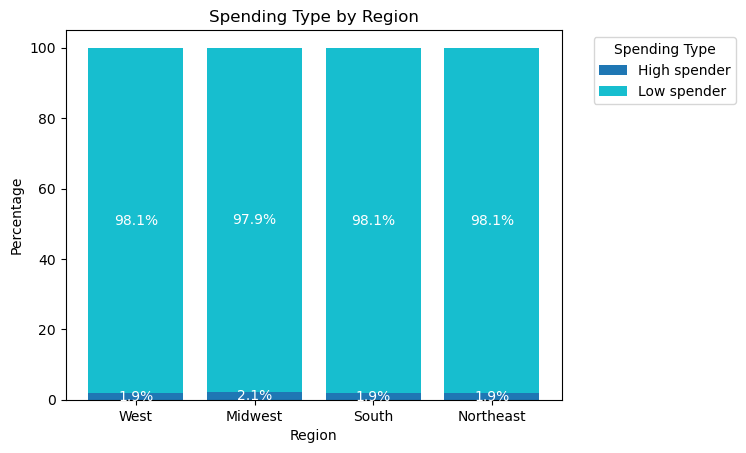

In [119]:
# Preview the stacked bar chart.
create_stacked_bar_chart(ct_stacked, title='Spending Type by Region', y_label='Percentage', x_label='Region', legend_title='Spending Type', colormap='tab10')

/var/folders/3j/v2m3l9zn34b54kd8m0lcnww40000gn/T/ipykernel_55411/4121099036.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_position = bottom[j] - (value * 100 / 2)


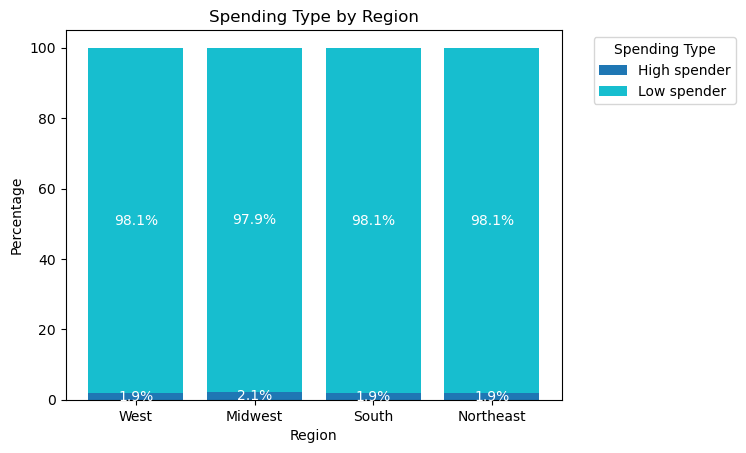

In [120]:
# Create the stacked bar chart.
fig, ax = create_stacked_bar_chart(ct_stacked, title='Spending Type by Region', y_label='Percentage', x_label='Region', legend_title='Spending Type', colormap='tab10')
stacked_bar_region_spending_type = fig

In [122]:
# Export plot as an image; Define the folder path and file name
folder_path = r'/Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/'
file_name = 'stacked_bar_region_spending_type.png'

# Validate folder
os.makedirs(folder_path, exist_ok=True)

# Create the full file path
file_path = os.path.join(folder_path, '04 Analysis', 'Visualizations', file_name)

# Export the plot to an image file
stacked_bar_region_spending_type.figure.savefig(file_path, bbox_inches='tight', dpi=300)
print(f'Plot exported to {file_path}')

Plot exported to /Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/04 Analysis/Visualizations/stacked_bar_region_spending_type.png


### 02. Low-Activity Customer Exclusion

In [20]:
# Create and populate the variable 'activity_level' which identifies low-activity customers.
df_merged.loc[df_merged['max_order'] < 5, 'activity_level'] = 'Low Activity'
df_merged.loc[df_merged['max_order'] >= 5, 'activity_level'] = 'Regular Activity'
df_merged

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_type,order_frequency,customer_frequency,gender,state,age,date_joined,dependents,fam_status,income,region,activity_level
0,0.0,2539329.0,1.0,1.0,2.0,8.0,NaN,196,1.0,0.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity
1,1.0,2398795.0,1.0,2.0,3.0,7.0,15.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Regularly busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity
2,2.0,473747.0,1.0,3.0,3.0,12.0,21.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Regularly busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity
3,3.0,2254736.0,1.0,4.0,4.0,7.0,29.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Least busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity
4,4.0,431534.0,1.0,5.0,4.0,15.0,28.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Least busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32435054,1768145.0,156685.0,106143.0,26.0,4.0,23.0,5.0,19675,1.0,1.0,both,Organic Raspberry Black Tea,94.0,7.0,10.7,Mid-range product,Mid-range product,Least busy,Slowest days,Average orders,26.0,Regular customer,10.700000,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,Regular Activity
32435055,1101646.0,484769.0,66343.0,1.0,6.0,11.0,NaN,47210,1.0,0.0,both,Fresh Farmed Tilapia Fillet,15.0,12.0,8.1,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,4.0,New customer,8.100000,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low Activity
32435056,1101647.0,1561557.0,66343.0,2.0,1.0,11.0,30.0,47210,1.0,1.0,both,Fresh Farmed Tilapia Fillet,15.0,12.0,8.1,Mid-range product,Mid-range product,Regularly busy,Busiest days,Most orders,4.0,New customer,8.100000,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low Activity
32435057,1101648.0,276317.0,66343.0,3.0,6.0,15.0,19.0,47210,1.0,1.0,both,Fresh Farmed Tilapia Fillet,15.0,12.0,8.1,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders,4.0,New customer,8.100000,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low Activity


In [21]:
# Review value counts for the variable 'profiling_age'.
df_merged['activity_level'].value_counts(dropna = False).sort_index()

activity_level
Low Activity         1441570
Regular Activity    30993489
Name: count, dtype: int64

In [22]:
# Preview DataFrame subset that removes low activity customers.
df_merged.loc[df_merged['activity_level'].isin(['Regular Activity'])]

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_type,order_frequency,customer_frequency,gender,state,age,date_joined,dependents,fam_status,income,region,activity_level
0,0.0,2539329.0,1.0,1.0,2.0,8.0,NaN,196,1.0,0.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity
1,1.0,2398795.0,1.0,2.0,3.0,7.0,15.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Regularly busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity
2,2.0,473747.0,1.0,3.0,3.0,12.0,21.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Regularly busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity
3,3.0,2254736.0,1.0,4.0,4.0,7.0,29.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Least busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity
4,4.0,431534.0,1.0,5.0,4.0,15.0,28.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Least busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32435050,1768141.0,3308056.0,106143.0,22.0,4.0,20.0,10.0,19675,1.0,1.0,both,Organic Raspberry Black Tea,94.0,7.0,10.7,Mid-range product,Mid-range product,Least busy,Slowest days,Average orders,26.0,Regular customer,10.700000,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,Regular Activity
32435051,1768142.0,2988973.0,106143.0,23.0,2.0,22.0,5.0,19675,1.0,1.0,both,Organic Raspberry Black Tea,94.0,7.0,10.7,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders,26.0,Regular customer,10.700000,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,Regular Activity
32435052,1768143.0,930.0,106143.0,24.0,6.0,12.0,4.0,19675,1.0,1.0,both,Organic Raspberry Black Tea,94.0,7.0,10.7,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders,26.0,Regular customer,10.700000,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,Regular Activity
32435053,1768144.0,467253.0,106143.0,25.0,6.0,16.0,7.0,19675,1.0,1.0,both,Organic Raspberry Black Tea,94.0,7.0,10.7,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders,26.0,Regular customer,10.700000,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,Regular Activity


In [23]:
# Create DataFrame subset that removes low activity customers.
df_regular_activity = df_merged.loc[df_merged['activity_level'].isin(['Regular Activity'])]
df_regular_activity

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_type,order_frequency,customer_frequency,gender,state,age,date_joined,dependents,fam_status,income,region,activity_level
0,0.0,2539329.0,1.0,1.0,2.0,8.0,NaN,196,1.0,0.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity
1,1.0,2398795.0,1.0,2.0,3.0,7.0,15.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Regularly busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity
2,2.0,473747.0,1.0,3.0,3.0,12.0,21.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Regularly busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity
3,3.0,2254736.0,1.0,4.0,4.0,7.0,29.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Least busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity
4,4.0,431534.0,1.0,5.0,4.0,15.0,28.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Least busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32435050,1768141.0,3308056.0,106143.0,22.0,4.0,20.0,10.0,19675,1.0,1.0,both,Organic Raspberry Black Tea,94.0,7.0,10.7,Mid-range product,Mid-range product,Least busy,Slowest days,Average orders,26.0,Regular customer,10.700000,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,Regular Activity
32435051,1768142.0,2988973.0,106143.0,23.0,2.0,22.0,5.0,19675,1.0,1.0,both,Organic Raspberry Black Tea,94.0,7.0,10.7,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders,26.0,Regular customer,10.700000,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,Regular Activity
32435052,1768143.0,930.0,106143.0,24.0,6.0,12.0,4.0,19675,1.0,1.0,both,Organic Raspberry Black Tea,94.0,7.0,10.7,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders,26.0,Regular customer,10.700000,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,Regular Activity
32435053,1768144.0,467253.0,106143.0,25.0,6.0,16.0,7.0,19675,1.0,1.0,both,Organic Raspberry Black Tea,94.0,7.0,10.7,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders,26.0,Regular customer,10.700000,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,Regular Activity


In [24]:
# Export sample df_regular_activity; Define the folder path and file name.
folder_path = r'/Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/'
file_name = 'CFO_sample.pkl'

# Create the full file path.
file_path = os.path.join(folder_path, '02 Data', 'Prepared Data', file_name)

# Export the DataFrame to a PKL file.
df_regular_activity.to_pickle(file_path)
print(f'DataFrame exported to {file_path}.')

DataFrame exported to /Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/02 Data/Prepared Data/CFO_sample.pkl.


### 03. Create Profiling Variables

#### 01. Age Profiles

In [25]:
# Create and populate the variable 'profiling_age' for profiling.
df_merged.loc[df_merged['age'] < 25, 'profiling_age'] = '18 to 24'
df_merged.loc[(df_merged['age'] >= 25) & (df_merged['age'] < 35), 'profiling_age'] = '25 to 34'
df_merged.loc[(df_merged['age'] >= 35) & (df_merged['age'] < 45), 'profiling_age'] = '35 to 44'
df_merged.loc[(df_merged['age'] >= 45) & (df_merged['age'] < 55), 'profiling_age'] = '45 to 54'
df_merged.loc[(df_merged['age'] >= 55) & (df_merged['age'] < 65), 'profiling_age'] = '55 to 64'
df_merged.loc[df_merged['age'] >= 65, 'profiling_age'] = '65+'
df_merged

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_type,order_frequency,customer_frequency,gender,state,age,date_joined,dependents,fam_status,income,region,activity_level,profiling_age
0,0.0,2539329.0,1.0,1.0,2.0,8.0,NaN,196,1.0,0.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity,25 to 34
1,1.0,2398795.0,1.0,2.0,3.0,7.0,15.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Regularly busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity,25 to 34
2,2.0,473747.0,1.0,3.0,3.0,12.0,21.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Regularly busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity,25 to 34
3,3.0,2254736.0,1.0,4.0,4.0,7.0,29.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Least busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity,25 to 34
4,4.0,431534.0,1.0,5.0,4.0,15.0,28.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Least busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity,25 to 34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32435054,1768145.0,156685.0,106143.0,26.0,4.0,23.0,5.0,19675,1.0,1.0,both,Organic Raspberry Black Tea,94.0,7.0,10.7,Mid-range product,Mid-range product,Least busy,Slowest days,Average orders,26.0,Regular customer,10.700000,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,Regular Activity,25 to 34
32435055,1101646.0,484769.0,66343.0,1.0,6.0,11.0,NaN,47210,1.0,0.0,both,Fresh Farmed Tilapia Fillet,15.0,12.0,8.1,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,4.0,New customer,8.100000,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low Activity,18 to 24
32435056,1101647.0,1561557.0,66343.0,2.0,1.0,11.0,30.0,47210,1.0,1.0,both,Fresh Farmed Tilapia Fillet,15.0,12.0,8.1,Mid-range product,Mid-range product,Regularly busy,Busiest days,Most orders,4.0,New customer,8.100000,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low Activity,18 to 24
32435057,1101648.0,276317.0,66343.0,3.0,6.0,15.0,19.0,47210,1.0,1.0,both,Fresh Farmed Tilapia Fillet,15.0,12.0,8.1,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders,4.0,New customer,8.100000,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low Activity,18 to 24


In [26]:
# Review value counts for the variable 'profiling_age'.
df_merged['profiling_age'].value_counts(dropna = False).sort_index()

profiling_age
18 to 24    3576409
25 to 34    5059322
35 to 44    5066950
45 to 54    5116055
55 to 64    5033514
65+         8582809
Name: count, dtype: int64

#### 02. Income Profiles

In [27]:
# Create and populate the variable 'profiling_income' for profiling.
df_merged.loc[df_merged['income'] <= 30000, 'profiling_income'] = 'Lower class'
df_merged.loc[(df_merged['income'] > 30000) & (df_merged['income'] <= 58020), 'profiling_income'] = 'Lower-middle class'
df_merged.loc[(df_merged['income'] > 58020) & (df_merged['income'] <= 94000), 'profiling_income'] = 'Middle class'
df_merged.loc[(df_merged['income'] > 94000) & (df_merged['income'] <= 153000), 'profiling_income'] = 'Upper-middle class'
df_merged.loc[df_merged['income'] > 153000, 'profiling_income'] = 'Upper class'
df_merged

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_type,order_frequency,customer_frequency,gender,state,age,date_joined,dependents,fam_status,income,region,activity_level,profiling_age,profiling_income
0,0.0,2539329.0,1.0,1.0,2.0,8.0,NaN,196,1.0,0.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity,25 to 34,Lower-middle class
1,1.0,2398795.0,1.0,2.0,3.0,7.0,15.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Regularly busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity,25 to 34,Lower-middle class
2,2.0,473747.0,1.0,3.0,3.0,12.0,21.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Regularly busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity,25 to 34,Lower-middle class
3,3.0,2254736.0,1.0,4.0,4.0,7.0,29.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Least busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity,25 to 34,Lower-middle class
4,4.0,431534.0,1.0,5.0,4.0,15.0,28.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Least busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity,25 to 34,Lower-middle class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32435054,1768145.0,156685.0,106143.0,26.0,4.0,23.0,5.0,19675,1.0,1.0,both,Organic Raspberry Black Tea,94.0,7.0,10.7,Mid-range product,Mid-range product,Least busy,Slowest days,Average orders,26.0,Regular customer,10.700000,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,Regular Activity,25 to 34,Lower-middle class
32435055,1101646.0,484769.0,66343.0,1.0,6.0,11.0,NaN,47210,1.0,0.0,both,Fresh Farmed Tilapia Fillet,15.0,12.0,8.1,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,4.0,New customer,8.100000,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low Activity,18 to 24,Lower-middle class
32435056,1101647.0,1561557.0,66343.0,2.0,1.0,11.0,30.0,47210,1.0,1.0,both,Fresh Farmed Tilapia Fillet,15.0,12.0,8.1,Mid-range product,Mid-range product,Regularly busy,Busiest days,Most orders,4.0,New customer,8.100000,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low Activity,18 to 24,Lower-middle class
32435057,1101648.0,276317.0,66343.0,3.0,6.0,15.0,19.0,47210,1.0,1.0,both,Fresh Farmed Tilapia Fillet,15.0,12.0,8.1,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders,4.0,New customer,8.100000,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low Activity,18 to 24,Lower-middle class


In [28]:
# Review value counts for the variable 'profiling_income'.
df_merged['profiling_income'].value_counts(dropna = False).sort_index()

profiling_income
Lower class             207526
Lower-middle class     5414386
Middle class           9518805
Upper class            3497005
Upper-middle class    13797337
Name: count, dtype: int64

#### 03. Department Profiles

In [29]:
# Create and populate the variable 'profiling_departments' to identify customers who buy specialized products.
df_merged.loc[df_merged['department_id'].isin([1, 3, 4, 6, 7, 9, 10, 12, 13, 14, 15, 16, 19, 20]), 'profiling_departments'] = 'food'
df_merged.loc[df_merged['department_id'].isin([2, 21]), 'profiling_departments'] = 'misc'
df_merged.loc[df_merged['department_id'].isin([5]), 'profiling_departments'] = 'alcohol'
df_merged.loc[df_merged['department_id'].isin([8]), 'profiling_departments'] = 'pets'
df_merged.loc[df_merged['department_id'].isin([11, 17]), 'profiling_departments'] = 'household'
df_merged.loc[df_merged['department_id'].isin([18]), 'profiling_departments'] = 'parents'
df_merged

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_type,order_frequency,customer_frequency,gender,state,age,date_joined,dependents,fam_status,income,region,activity_level,profiling_age,profiling_income,profiling_departments
0,0.0,2539329.0,1.0,1.0,2.0,8.0,NaN,196,1.0,0.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity,25 to 34,Lower-middle class,food
1,1.0,2398795.0,1.0,2.0,3.0,7.0,15.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Regularly busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity,25 to 34,Lower-middle class,food
2,2.0,473747.0,1.0,3.0,3.0,12.0,21.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Regularly busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity,25 to 34,Lower-middle class,food
3,3.0,2254736.0,1.0,4.0,4.0,7.0,29.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Least busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity,25 to 34,Lower-middle class,food
4,4.0,431534.0,1.0,5.0,4.0,15.0,28.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Least busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity,25 to 34,Lower-middle class,food
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32435054,1768145.0,156685.0,106143.0,26.0,4.0,23.0,5.0,19675,1.0,1.0,both,Organic Raspberry Black Tea,94.0,7.0,10.7,Mid-range product,Mid-range product,Least busy,Slowest days,Average orders,26.0,Regular customer,10.700000,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,Regular Activity,25 to 34,Lower-middle class,food
32435055,1101646.0,484769.0,66343.0,1.0,6.0,11.0,NaN,47210,1.0,0.0,both,Fresh Farmed Tilapia Fillet,15.0,12.0,8.1,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,4.0,New customer,8.100000,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low Activity,18 to 24,Lower-middle class,food
32435056,1101647.0,1561557.0,66343.0,2.0,1.0,11.0,30.0,47210,1.0,1.0,both,Fresh Farmed Tilapia Fillet,15.0,12.0,8.1,Mid-range product,Mid-range product,Regularly busy,Busiest days,Most orders,4.0,New customer,8.100000,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low Activity,18 to 24,Lower-middle class,food
32435057,1101648.0,276317.0,66343.0,3.0,6.0,15.0,19.0,47210,1.0,1.0,both,Fresh Farmed Tilapia Fillet,15.0,12.0,8.1,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders,4.0,New customer,8.100000,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low Activity,18 to 24,Lower-middle class,food


#### 04. Family Type Profiles

In [30]:
# Review variable 'fam_status' values.
df_merged['fam_status'].value_counts(dropna = False).sort_index()

fam_status
divorced/widowed                     2774460
living with parents and siblings     1552215
married                             22777499
single                               5330885
Name: count, dtype: int64

In [31]:
# Review variable 'dependents' values.
df_merged['dependents'].value_counts(dropna = False).sort_index()

dependents
0    8105345
1    8088465
2    8098734
3    8142515
Name: count, dtype: int64

In [32]:
# Create and populate the variable 'profiling_family_type' to identify family types of the customers.
df_merged.loc[(df_merged['dependents'].isin([0]) & (df_merged['fam_status'].isin(['divorced/widowed', 'single']))), 'profiling_family_type'] = 'Single'
df_merged.loc[(df_merged['dependents'].isin([0]) & (df_merged['fam_status'].isin(['married']))), 'profiling_family_type'] = 'Small family'
df_merged.loc[(df_merged['dependents'].isin([0]) & (df_merged['fam_status'].isin(['living with parents and siblings']))), 'profiling_family_type'] = 'Standard family'
df_merged.loc[(df_merged['dependents'].isin([1]) & (df_merged['fam_status'].isin(['divorced/widowed', 'single', 'married']))), 'profiling_family_type'] = 'Small family'
df_merged.loc[(df_merged['dependents'].isin([1, 2, 3]) & (df_merged['fam_status'].isin(['living with parents and siblings']))), 'profiling_family_type'] = 'Large family'
df_merged.loc[(df_merged['dependents'].isin([2]) & (df_merged['fam_status'].isin(['divorced/widowed', 'single', 'married']))), 'profiling_family_type'] = 'Standard family'
df_merged.loc[(df_merged['dependents'].isin([3]) & (df_merged['fam_status'].isin(['divorced/widowed', 'single', 'married']))), 'profiling_family_type'] = 'Large family'
df_merged

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_type,order_frequency,customer_frequency,gender,state,age,date_joined,dependents,fam_status,income,region,activity_level,profiling_age,profiling_income,profiling_departments,profiling_family_type
0,0.0,2539329.0,1.0,1.0,2.0,8.0,NaN,196,1.0,0.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity,25 to 34,Lower-middle class,food,Large family
1,1.0,2398795.0,1.0,2.0,3.0,7.0,15.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Regularly busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity,25 to 34,Lower-middle class,food,Large family
2,2.0,473747.0,1.0,3.0,3.0,12.0,21.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Regularly busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity,25 to 34,Lower-middle class,food,Large family
3,3.0,2254736.0,1.0,4.0,4.0,7.0,29.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Least busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity,25 to 34,Lower-middle class,food,Large family
4,4.0,431534.0,1.0,5.0,4.0,15.0,28.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Least busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity,25 to 34,Lower-middle class,food,Large family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32435054,1768145.0,156685.0,106143.0,26.0,4.0,23.0,5.0,19675,1.0,1.0,both,Organic Raspberry Black Tea,94.0,7.0,10.7,Mid-range product,Mid-range product,Least busy,Slowest days,Average orders,26.0,Regular customer,10.700000,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,Regular Activity,25 to 34,Lower-middle class,food,Single
32435055,1101646.0,484769.0,66343.0,1.0,6.0,11.0,NaN,47210,1.0,0.0,both,Fresh Farmed Tilapia Fillet,15.0,12.0,8.1,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,4.0,New customer,8.100000,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low Activity,18 to 24,Lower-middle class,food,Large family
32435056,1101647.0,1561557.0,66343.0,2.0,1.0,11.0,30.0,47210,1.0,1.0,both,Fresh Farmed Tilapia Fillet,15.0,12.0,8.1,Mid-range product,Mid-range product,Regularly busy,Busiest days,Most orders,4.0,New customer,8.100000,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low Activity,18 to 24,Lower-middle class,food,Large family
32435057,1101648.0,276317.0,66343.0,3.0,6.0,15.0,19.0,47210,1.0,1.0,both,Fresh Farmed Tilapia Fillet,15.0,12.0,8.1,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders,4.0,New customer,8.100000,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low Activity,18 to 24,Lower-middle class,food,Large family


In [33]:
# Review variable 'dependents' values.
df_merged['profiling_family_type'].value_counts(dropna = False).sort_index()

profiling_family_type
Large family       9181690
Single             8105345
Small family       7557836
Standard family    7590188
Name: count, dtype: int64

### 04. Distribution Visualizations

#### 01. Create a Profiling DataFrame

In [34]:
# Create a new DataFrame comprised of records grouped by variable 'user_id' and maintain variables 'profiling_age', 'profiling_income', 'profiling_departments', and 'profiling_family_type'.
df_profiling = df_merged.groupby('user_id').agg({
    'profiling_age': 'first',
    'profiling_income': 'first',
    'profiling_family_type': 'first'
}).reset_index()
df_profiling

,user_id,profiling_age,profiling_income,profiling_family_type
0,1.0,25 to 34,Lower-middle class,Large family
1,2.0,65+,Middle class,Large family
2,3.0,25 to 34,Middle class,Large family
3,4.0,25 to 34,Lower-middle class,Large family
4,5.0,65+,Upper-middle class,Single
...,...,...,...,...
206204,206205.0,35 to 44,Upper-middle class,Standard family
206205,206206.0,25 to 34,Middle class,Standard family
206206,206207.0,65+,Upper-middle class,Small family
206207,206208.0,55 to 64,Upper class,Small family


In [35]:
# Review value counts for all variables.
for column in df_profiling:
    print(f"Value counts for {column}:")
    print(df_profiling[column].value_counts(dropna = False).sort_index())
    print()

Value counts for user_id:
user_id
1.0         1
2.0         1
3.0         1
4.0         1
5.0         1
           ..
206205.0    1
206206.0    1
206207.0    1
206208.0    1
206209.0    1
Name: count, Length: 206209, dtype: int64

Value counts for profiling_age:
profiling_age
18 to 24    22560
25 to 34    32280
35 to 44    32060
45 to 54    32424
55 to 64    32156
65+         54729
Name: count, dtype: int64

Value counts for profiling_income:
profiling_income
Lower class            2099
Lower-middle class    45861
Middle class          56262
Upper class           19913
Upper-middle class    82074
Name: count, dtype: int64

Value counts for profiling_family_type:
profiling_family_type
Large family       58076
Single             51602
Small family       48307
Standard family    48224
Name: count, dtype: int64



#### 02. Age Distribution

<Axes: title={'center': 'Unique Users by Age Groups'}, xlabel='Age Groups', ylabel='Unique Users'>

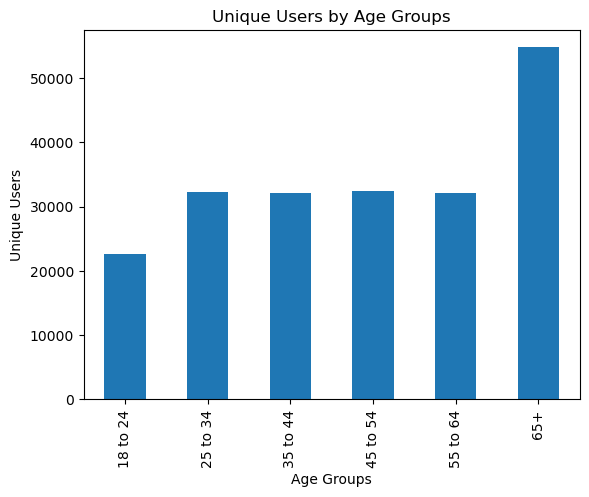

In [36]:
# Preview the bar chart.
df_profiling['profiling_age'].value_counts().sort_index().plot.bar(title = 'Unique Users by Age Groups', xlabel = 'Age Groups', ylabel = 'Unique Users')

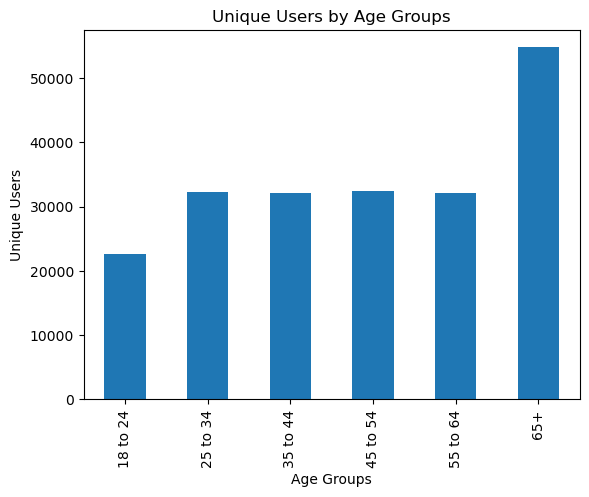

In [37]:
# Create the bar chart.
plot_bar_users_age = df_profiling['profiling_age'].value_counts().sort_index().plot.bar(title = 'Unique Users by Age Groups', xlabel = 'Age Groups', ylabel = 'Unique Users')

In [38]:
# Export plot as an image; Define the folder path and file name
folder_path = r'/Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/'
file_name = 'plot_bar_users_age.png'

# Validate folder
os.makedirs(folder_path, exist_ok=True)

# Create the full file path
file_path = os.path.join(folder_path, '04 Analysis', 'Visualizations', file_name)

# Export the plot to an image file
plot_bar_users_age.figure.savefig(file_path)

print(f'Plot exported to {file_path}')

Plot exported to /Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/04 Analysis/Visualizations/plot_bar_users_age.png


#### 03. Income Distribution

In [39]:
# Adjust the x-axis order; Preview a new DataFrame with a custom order of the value counts for the variable 'profiling_income'.
custom_order = ['Lower class', 'Lower-middle class', 'Middle class', 'Upper-middle class', 'Upper class']
df_profiling['profiling_income'].value_counts().reindex(custom_order)

profiling_income
Lower class            2099
Lower-middle class    45861
Middle class          56262
Upper-middle class    82074
Upper class           19913
Name: count, dtype: int64

<Axes: title={'center': 'Unique Users by Income Groups'}, xlabel='Income Groups', ylabel='Unique Users'>

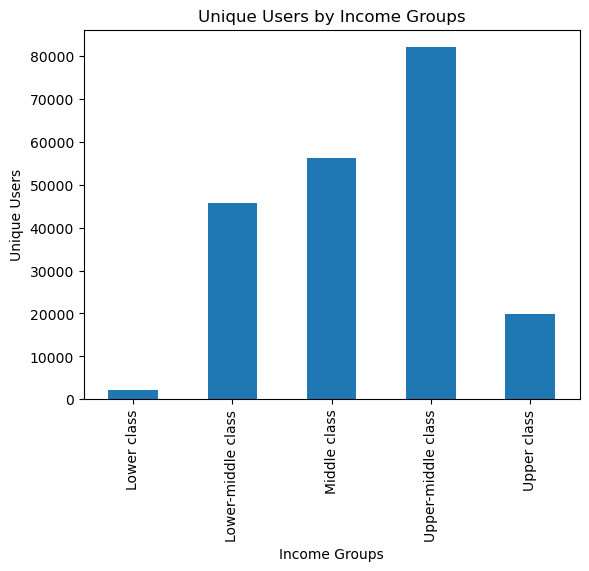

In [40]:
# Preview the bar chart.
df_profiling['profiling_income'].value_counts().reindex(custom_order).plot.bar(title = 'Unique Users by Income Groups', xlabel = 'Income Groups', ylabel = 'Unique Users')

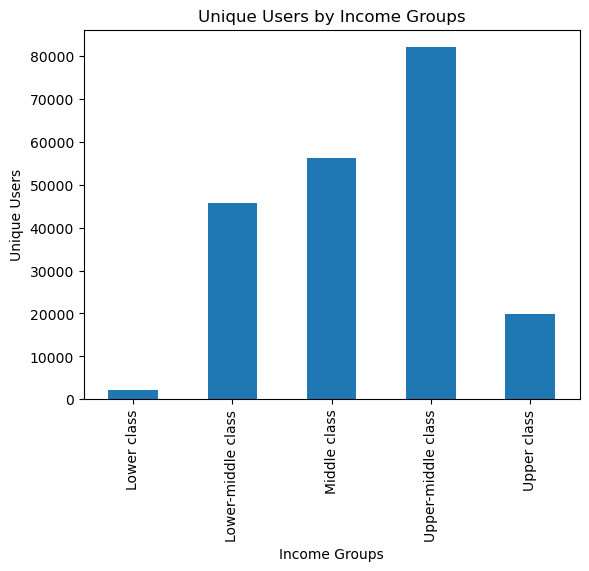

In [41]:
# Create the bar chart.
plot_bar_users_income = df_profiling['profiling_income'].value_counts().reindex(custom_order).plot.bar(title = 'Unique Users by Income Groups', xlabel = 'Income Groups', ylabel = 'Unique Users')

In [42]:
# Export plot as an image; Define the folder path and file name
folder_path = r'/Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/'
file_name = 'plot_bar_users_income.png'

# Validate folder
os.makedirs(folder_path, exist_ok=True)

# Create the full file path
file_path = os.path.join(folder_path, '04 Analysis', 'Visualizations', file_name)

# Export the plot to an image file
plot_bar_users_income.figure.savefig(file_path)

print(f'Plot exported to {file_path}')

Plot exported to /Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/04 Analysis/Visualizations/plot_bar_users_income.png


#### 04. Department Distribution

In [43]:
# Create and populate the variable 'department_name' for plot labels.
df_merged.loc[df_merged['department_id'] == 1, 'department_name'] = 'frozen'
df_merged.loc[df_merged['department_id'] == 2, 'department_name'] = 'other'
df_merged.loc[df_merged['department_id'] == 3, 'department_name'] = 'bakery'
df_merged.loc[df_merged['department_id'] == 4, 'department_name'] = 'produce'
df_merged.loc[df_merged['department_id'] == 5, 'department_name'] = 'alcohol'
df_merged.loc[df_merged['department_id'] == 6, 'department_name'] = 'international'
df_merged.loc[df_merged['department_id'] == 7, 'department_name'] = 'beverages'
df_merged.loc[df_merged['department_id'] == 8, 'department_name'] = 'pets'
df_merged.loc[df_merged['department_id'] == 9, 'department_name'] = 'dry goods pasta'
df_merged.loc[df_merged['department_id'] == 10, 'department_name'] = 'bulk'
df_merged.loc[df_merged['department_id'] == 11, 'department_name'] = 'personal care'
df_merged.loc[df_merged['department_id'] == 12, 'department_name'] = 'meat seafood'
df_merged.loc[df_merged['department_id'] == 13, 'department_name'] = 'pantry'
df_merged.loc[df_merged['department_id'] == 14, 'department_name'] = 'breakfast'
df_merged.loc[df_merged['department_id'] == 15, 'department_name'] = 'canned goods'
df_merged.loc[df_merged['department_id'] == 16, 'department_name'] = 'dairy eggs'
df_merged.loc[df_merged['department_id'] == 17, 'department_name'] = 'household'
df_merged.loc[df_merged['department_id'] == 18, 'department_name'] = 'babies'
df_merged.loc[df_merged['department_id'] == 19, 'department_name'] = 'snacks'
df_merged.loc[df_merged['department_id'] == 20, 'department_name'] = 'deli'
df_merged.loc[df_merged['department_id'] == 21, 'department_name'] = 'missing'
df_merged

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_type,order_frequency,customer_frequency,gender,state,age,date_joined,dependents,fam_status,income,region,activity_level,profiling_age,profiling_income,profiling_departments,profiling_family_type,department_name
0,0.0,2539329.0,1.0,1.0,2.0,8.0,NaN,196,1.0,0.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity,25 to 34,Lower-middle class,food,Large family,beverages
1,1.0,2398795.0,1.0,2.0,3.0,7.0,15.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Regularly busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity,25 to 34,Lower-middle class,food,Large family,beverages
2,2.0,473747.0,1.0,3.0,3.0,12.0,21.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Regularly busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity,25 to 34,Lower-middle class,food,Large family,beverages
3,3.0,2254736.0,1.0,4.0,4.0,7.0,29.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Least busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity,25 to 34,Lower-middle class,food,Large family,beverages
4,4.0,431534.0,1.0,5.0,4.0,15.0,28.0,196,1.0,1.0,both,Soda,77.0,7.0,9.0,Mid-range product,Mid-range product,Least busy,Slowest days,Average orders,10.0,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,Regular Activity,25 to 34,Lower-middle class,food,Large family,beverages
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32435054,1768145.0,156685.0,106143.0,26.0,4.0,23.0,5.0,19675,1.0,1.0,both,Organic Raspberry Black Tea,94.0,7.0,10.7,Mid-range product,Mid-range product,Least busy,Slowest days,Average orders,26.0,Regular customer,10.700000,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,Regular Activity,25 to 34,Lower-middle class,food,Single,beverages
32435055,1101646.0,484769.0,66343.0,1.0,6.0,11.0,NaN,47210,1.0,0.0,both,Fresh Farmed Tilapia Fillet,15.0,12.0,8.1,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Most orders,4.0,New customer,8.100000,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low Activity,18 to 24,Lower-middle class,food,Large family,meat seafood
32435056,1101647.0,1561557.0,66343.0,2.0,1.0,11.0,30.0,47210,1.0,1.0,both,Fresh Farmed Tilapia Fillet,15.0,12.0,8.1,Mid-range product,Mid-range product,Regularly busy,Busiest days,Most orders,4.0,New customer,8.100000,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low Activity,18 to 24,Lower-middle class,food,Large family,meat seafood
32435057,1101648.0,276317.0,66343.0,3.0,6.0,15.0,19.0,47210,1.0,1.0,both,Fresh Farmed Tilapia Fillet,15.0,12.0,8.1,Mid-range product,Mid-range product,Regularly busy,Regularly busy,Average orders,4.0,New customer,8.100000,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low Activity,18 to 24,Lower-middle class,food,Large family,meat seafood


In [44]:
# Review value counts for the variable 'department_name'.
df_merged['department_name'].value_counts(dropna = False)

department_name
produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
nan                  30200
Name: count, dtype: int64

<Axes: title={'center': 'Orders by Department'}, xlabel='Department', ylabel='Orders in millions'>

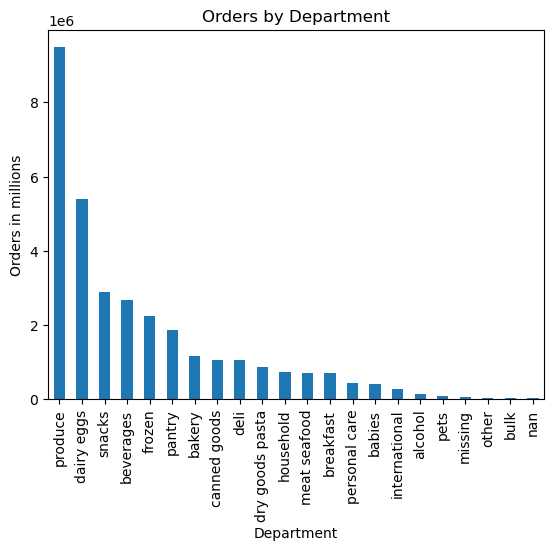

In [45]:
# Preview the bar chart.
df_merged['department_name'].value_counts().plot.bar(title = 'Orders by Department', xlabel = 'Department', ylabel = 'Orders in millions')

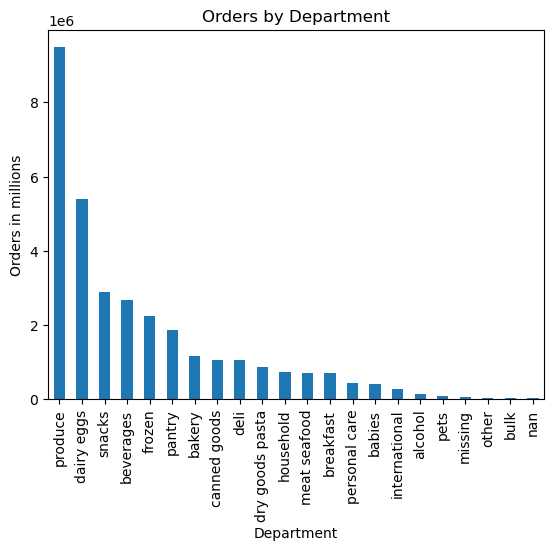

In [46]:
# Create the bar chart.
plot_bar_department_orders = df_merged['department_name'].value_counts().plot.bar(title = 'Orders by Department', xlabel = 'Department', ylabel = 'Orders in millions')

In [125]:
# Export plot as an image; Define the folder path and file name
folder_path = r'/Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/'
file_name = 'plot_bar_department_orders.png'

# Validate folder
os.makedirs(folder_path, exist_ok=True)

# Create the full file path
file_path = os.path.join(folder_path, '04 Analysis', 'Visualizations', file_name)

# Export the plot to an image file
plot_bar_department_orders.figure.savefig(file_path, bbox_inches='tight', dpi=300)

print(f'Plot exported to {file_path}')

Plot exported to /Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/04 Analysis/Visualizations/plot_bar_department_orders.png


#### 05. Family Type Distribution

In [48]:
# Adjust the x-axis order; Preview a new DataFrame with a custom order of the value counts for the variable 'profiling_family_type'.
custom_order = ['Single', 'Small family', 'Standard family', 'Large family']
df_profiling['profiling_family_type'].value_counts().reindex(custom_order)

profiling_family_type
Single             51602
Small family       48307
Standard family    48224
Large family       58076
Name: count, dtype: int64

<Axes: title={'center': 'Unique Users by Family Type'}, xlabel='Family Type', ylabel='Unique Users'>

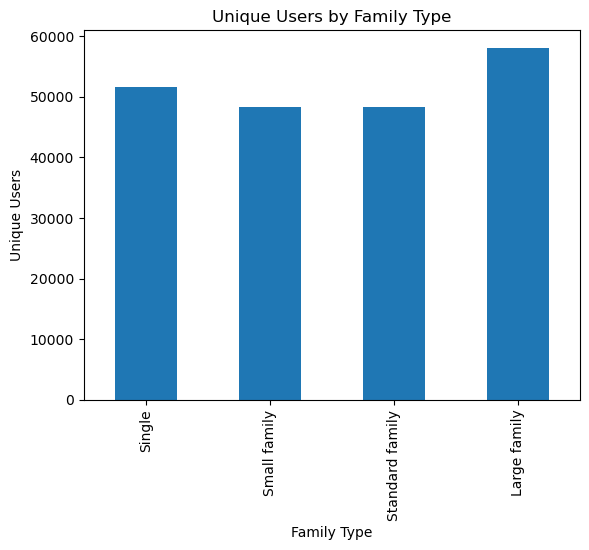

In [49]:
# Preview the bar chart.
df_profiling['profiling_family_type'].value_counts().reindex(custom_order).plot.bar(title = 'Unique Users by Family Type', xlabel = 'Family Type', ylabel = 'Unique Users')

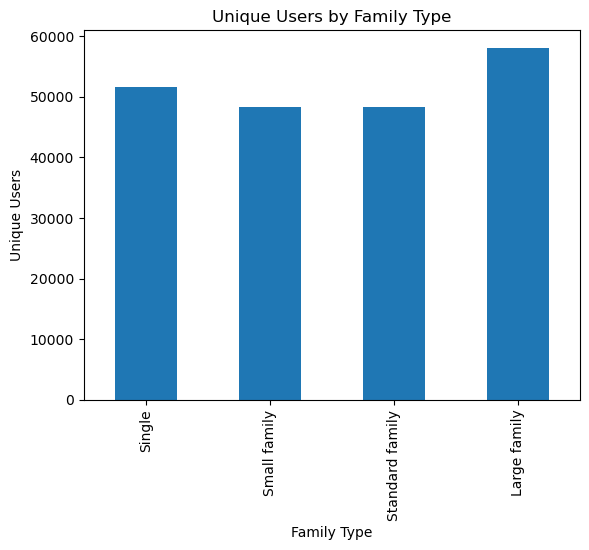

In [50]:
# Create the bar chart.
plot_bar_users_family_type = df_profiling['profiling_family_type'].value_counts().reindex(custom_order).plot.bar(title = 'Unique Users by Family Type', xlabel = 'Family Type', ylabel = 'Unique Users')

In [51]:
# Export plot as an image; Define the folder path and file name
folder_path = r'/Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/'
file_name = 'plot_bar_users_family_type.png'

# Validate folder
os.makedirs(folder_path, exist_ok=True)

# Create the full file path
file_path = os.path.join(folder_path, '04 Analysis', 'Visualizations', file_name)

# Export the plot to an image file
plot_bar_users_family_type.figure.savefig(file_path)

print(f'Plot exported to {file_path}')

Plot exported to /Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/04 Analysis/Visualizations/plot_bar_users_family_type.png


#### 06. Loyalty Customer Distribution

In [277]:
# Preview a new DataFrame by grouping variable 'user_id' and aggregating variables 'loyalty_flag' and 'user_id'
df_merged.groupby('user_id').agg({
	'loyalty_flag': ['first'],
    'user_id': ['count']
}).reset_index()

,user_id,loyalty_flag,user_id
,,first,count
0,1.0,New customer,59
1,2.0,Regular customer,195
2,3.0,Regular customer,88
3,4.0,New customer,18
4,5.0,New customer,37
...,...,...,...
206204,206205.0,New customer,32
206205,206206.0,Loyal customer,285
206206,206207.0,Regular customer,223


In [278]:
# Create the DataFrame
df_unique_loyalty = df_merged.groupby('user_id').agg({
	'loyalty_flag': ['first'],
    'user_id': ['count']
}).reset_index()
df_unique_loyalty

,user_id,loyalty_flag,user_id
,,first,count
0,1.0,New customer,59
1,2.0,Regular customer,195
2,3.0,Regular customer,88
3,4.0,New customer,18
4,5.0,New customer,37
...,...,...,...
206204,206205.0,New customer,32
206205,206206.0,Loyal customer,285
206206,206207.0,Regular customer,223


Text(0.5, 1.0, 'Loyalty Customer Distribution')

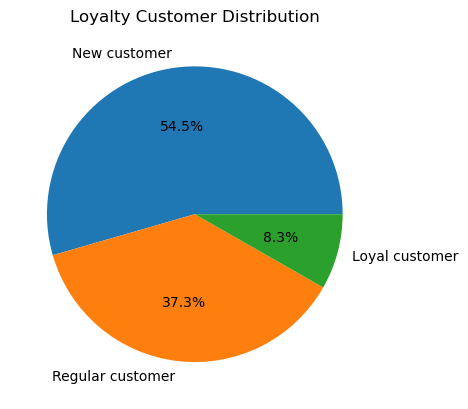

In [287]:
# Preview the pie chart
labels = ['New customer', 'Regular customer', 'Loyal customer']
plt.pie(df_unique_loyalty['loyalty_flag'].value_counts(), labels=labels, autopct='%1.1f%%')
plt.title('Loyalty Customer Distribution')

Plot exported to /Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/04 Analysis/Visualizations/pie_chart_loyalty.png


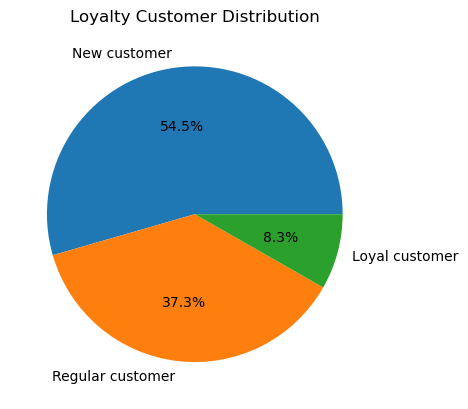

In [283]:
# Create and export the pie chart
# Create the pie chart
labels = ['New customer', 'Regular customer', 'Loyal customer']
plt.pie(df_unique_loyalty['loyalty_flag'].value_counts(), labels=labels, autopct='%1.1f%%')
plt.title('Loyalty Customer Distribution')

# Define the folder path and file name
folder_path = r'/Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/'
file_name = 'pie_chart_loyalty.png'

# Validate folder
os.makedirs(folder_path, exist_ok=True)

# Create the full file path
file_path = os.path.join(folder_path, '04 Analysis', 'Visualizations', file_name)

# Export the plot to an image file
plt.savefig(file_path, bbox_inches='tight', dpi=300)
print(f'Plot exported to {file_path}')

#### 07. Loyalty Customer Ordering Habits

<Axes: title={'center': 'Order Counts by Loyalty Status'}, xlabel='Loyalty Status', ylabel='Order Counts in 10 Millions'>

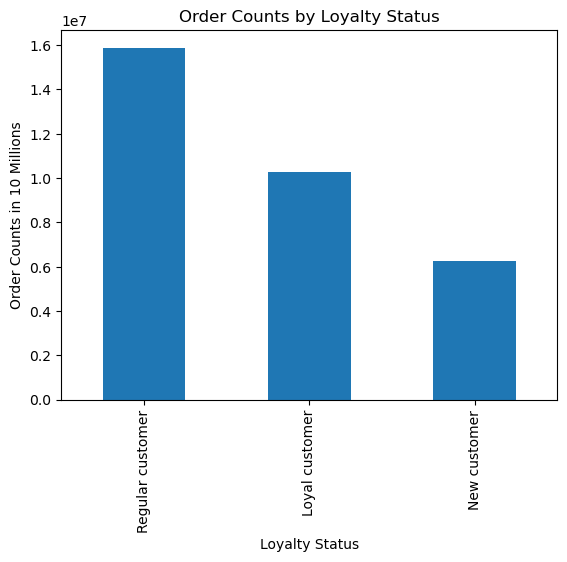

In [181]:
# Preview the bar chart.
df_merged['loyalty_flag'].value_counts().plot.bar(title = 'Order Counts by Loyalty Status', xlabel = 'Loyalty Status', ylabel = 'Order Counts in 10 Millions')

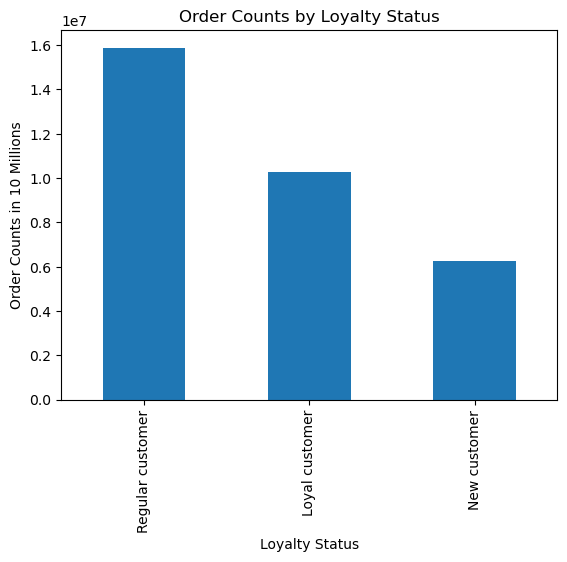

In [182]:
# Create the bar chart.
bar_loyalty_orders = df_merged['loyalty_flag'].value_counts().plot.bar(title = 'Order Counts by Loyalty Status', xlabel = 'Loyalty Status', ylabel = 'Order Counts in 10 Millions')

In [183]:
# Export plot as an image; Define the folder path and file name
folder_path = r'/Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/'
file_name = 'bar_loyalty_orders.png'

# Validate folder
os.makedirs(folder_path, exist_ok=True)

# Create the full file path
file_path = os.path.join(folder_path, '04 Analysis', 'Visualizations', file_name)

# Export the plot to an image file
bar_loyalty_orders.figure.savefig(file_path, bbox_inches='tight', dpi=300)
print(f'Plot exported to {file_path}')

Plot exported to /Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/04 Analysis/Visualizations/bar_loyalty_orders.png


In [192]:
# Group by user_id and calculate the total number of purchases for each user
user_purchases = df_merged.groupby('user_id').size().reset_index(name='total_purchases')

In [193]:
# Merge grouped data with loyalty_flag
user_loyalty = df_merged[['user_id', 'loyalty_flag']].drop_duplicates()
merged_df = pd.merge(user_purchases, user_loyalty, on='user_id')

In [194]:
# Calculate the average number of purchases for each loyalty_flag
avg_purchases_by_loyalty = merged_df.groupby('loyalty_flag')['total_purchases'].mean().reset_index()

<Axes: title={'center': 'Average Number of Purchases by Loyalty Status'}, xlabel='Loyalty Status', ylabel='Average Number of Purchases'>

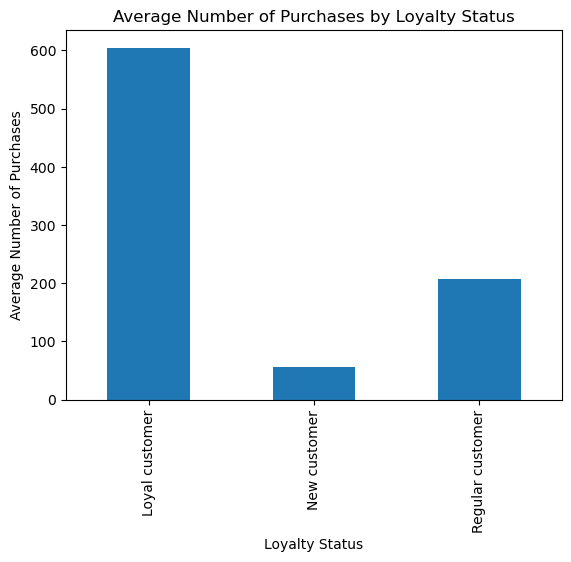

In [195]:
# Preview the bar chart.
avg_purchases_by_loyalty.set_index('loyalty_flag', inplace=True)
avg_purchases_by_loyalty.plot.bar(y='total_purchases', legend = False, xlabel = 'Loyalty Status', ylabel = 'Average Number of Purchases', title = 'Average Number of Purchases by Loyalty Status')

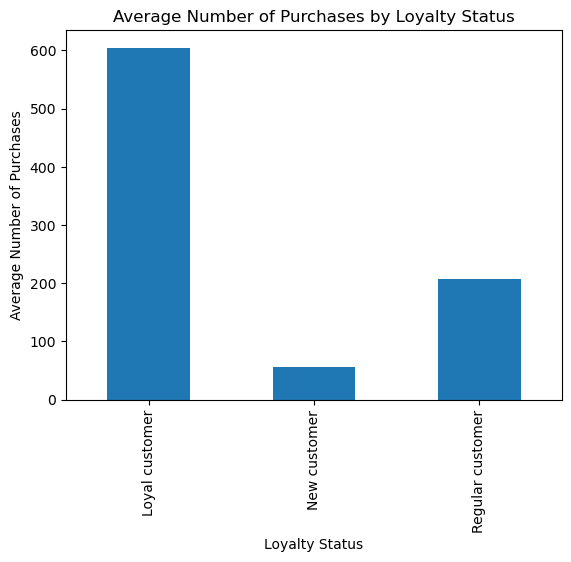

In [198]:
# Create the bar chart.
bar_loyalty_avg_purchases = avg_purchases_by_loyalty.plot.bar(y='total_purchases', legend = False, xlabel = 'Loyalty Status', ylabel = 'Average Number of Purchases', title = 'Average Number of Purchases by Loyalty Status')

In [199]:
# Export plot as an image; Define the folder path and file name
folder_path = r'/Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/'
file_name = 'bar_loyalty_avg_purchases.png'

# Validate folder
os.makedirs(folder_path, exist_ok=True)

# Create the full file path
file_path = os.path.join(folder_path, '04 Analysis', 'Visualizations', file_name)

# Export the plot to an image file
bar_loyalty_avg_purchases.figure.savefig(file_path, bbox_inches='tight', dpi=300)
print(f'Plot exported to {file_path}')

Plot exported to /Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/04 Analysis/Visualizations/bar_loyalty_avg_purchases.png


### 05. Customer Profile Stats

#### 01. Age Profiles

In [52]:
# View aggregate stats of variable 'days_since_prior_order' grouped by variable 'profiling_age'.
df_merged.groupby('profiling_age').agg({'days_since_prior_order': ['mean', 'max', 'min']})

days_since_prior_order           
                                mean   max  min
profiling_age                                  
18 to 24                   11.057190  30.0  0.0
25 to 34                   11.165310  30.0  0.0
35 to 44                   11.084770  30.0  0.0
45 to 54                   11.092378  30.0  0.0
55 to 64                   11.150376  30.0  0.0
65+                        11.078983  30.0  0.0

In [53]:
# View aggregate stats of variable 'prices' grouped by variable 'profiling_age'.
df_merged.groupby('profiling_age').agg({'prices': ['mean', 'max', 'min']})

prices           
                   mean   max  min
profiling_age                     
18 to 24       7.790869  25.0  1.0
25 to 34       7.782068  25.0  1.0
35 to 44       7.794179  25.0  1.0
45 to 54       7.788500  25.0  1.0
55 to 64       7.789916  25.0  1.0
65+            7.796546  25.0  1.0

#### 02. Income Profiles

In [54]:
# View aggregate stats of variable 'days_since_prior_order' grouped by variable 'profiling_income'.
df_merged.groupby('profiling_income').agg({'days_since_prior_order': ['mean', 'max', 'min']})

days_since_prior_order           
                                     mean   max  min
profiling_income                                    
Lower class                     11.976096  30.0  0.0
Lower-middle class              11.434410  30.0  0.0
Middle class                    10.989696  30.0  0.0
Upper class                     10.923469  30.0  0.0
Upper-middle class              11.087382  30.0  0.0

In [55]:
# View aggregate stats of variable 'prices' grouped by variable 'profiling_income'.
df_merged.groupby('profiling_income').agg({'prices': ['mean', 'max', 'min']})

prices           
                        mean   max  min
profiling_income                       
Lower class         6.524634  25.0  1.0
Lower-middle class  7.035215  25.0  1.0
Middle class        7.939903  25.0  1.0
Upper class         7.945239  25.0  1.0
Upper-middle class  7.964817  25.0  1.0

#### 03. Family Type Profiles

In [56]:
# View aggregate stats of variable 'days_since_prior_order' grouped by variable 'profiling_family_type'.
df_merged.groupby('profiling_family_type').agg({'days_since_prior_order': ['mean', 'max', 'min']})

days_since_prior_order           
                                        mean   max  min
profiling_family_type                                  
Large family                       11.106720  30.0  0.0
Single                             11.080597  30.0  0.0
Small family                       11.113124  30.0  0.0
Standard family                    11.117199  30.0  0.0

In [57]:
# View aggregate stats of variable 'prices' grouped by variable 'profiling_family_type'.
df_merged.groupby('profiling_family_type').agg({'prices': ['mean', 'max', 'min']})

prices           
                           mean   max  min
profiling_family_type                     
Large family           7.793227  25.0  1.0
Single                 7.789975  25.0  1.0
Small family           7.795712  25.0  1.0
Standard family        7.784684  25.0  1.0

### 06. Customer Profile Identification

#### 01. Family Type by Age Group

In [247]:
# Create a DataFrame, crosstab, and then grouped bar chart
# Create a crosstab with variable 'profiling_age' as rows and variable 'profiling_family_type' as columns
ct_grouped_bar_chart = pd.crosstab(index=df_profiling['profiling_age'], columns=df_profiling['profiling_family_type'])
ct_grouped_bar_chart

profiling_family_type,Large family,Single,Small family,Standard family
profiling_age,,,,
18 to 24,12130,5623,2442,2365
25 to 34,8016,8173,7872,8219
35 to 44,8000,8007,8151,7902
45 to 54,8137,8079,8130,8078
55 to 64,8147,8062,8038,7909
65+,13646,13658,13674,13751


In [248]:
# Set column order
column_order = ['Single', 'Small family', 'Standard family', 'Large family']
ct_grouped_bar_chart = ct_grouped_bar_chart[column_order]
ct_grouped_bar_chart

profiling_family_type,Single,Small family,Standard family,Large family
profiling_age,,,,
18 to 24,5623,2442,2365,12130
25 to 34,8173,7872,8219,8016
35 to 44,8007,8151,7902,8000
45 to 54,8079,8130,8078,8137
55 to 64,8062,8038,7909,8147
65+,13658,13674,13751,13646


<Axes: title={'center': 'Age Groups by Family Type'}, xlabel='Age Groups', ylabel='Customers'>

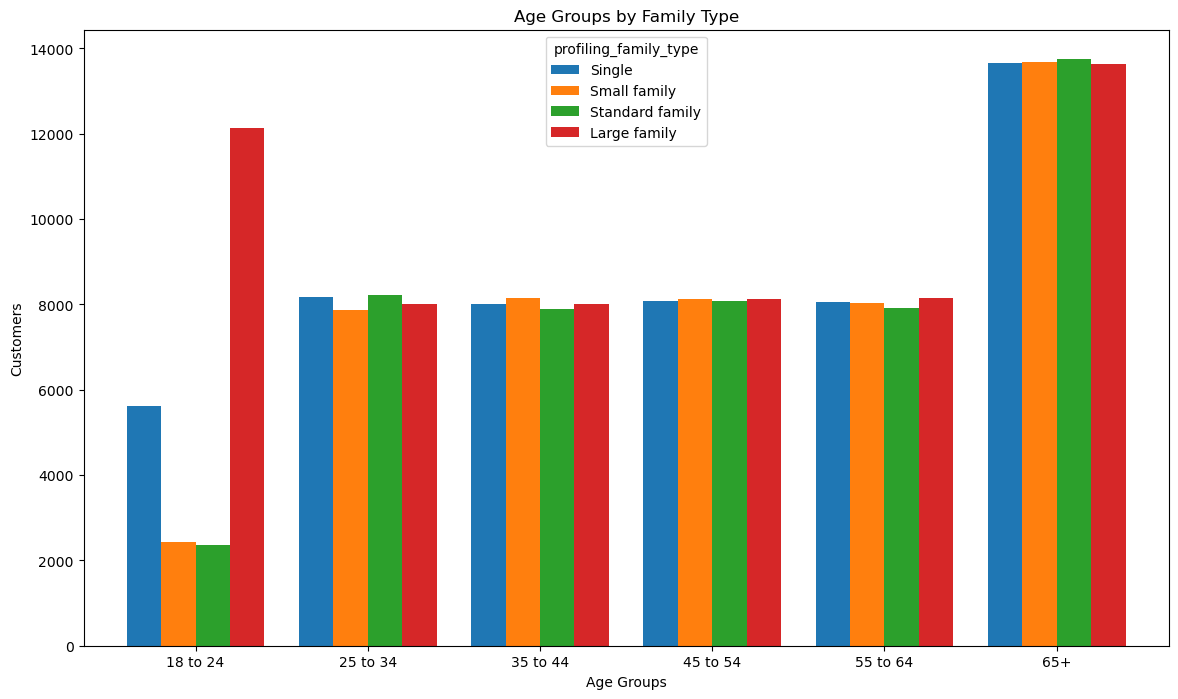

In [249]:
# Preview the grouped bar chart
ct_grouped_bar_chart.plot.bar(title = 'Age Groups by Family Type', xlabel = 'Age Groups', ylabel = 'Customers', rot=0, width=0.8, figsize=(14, 8))

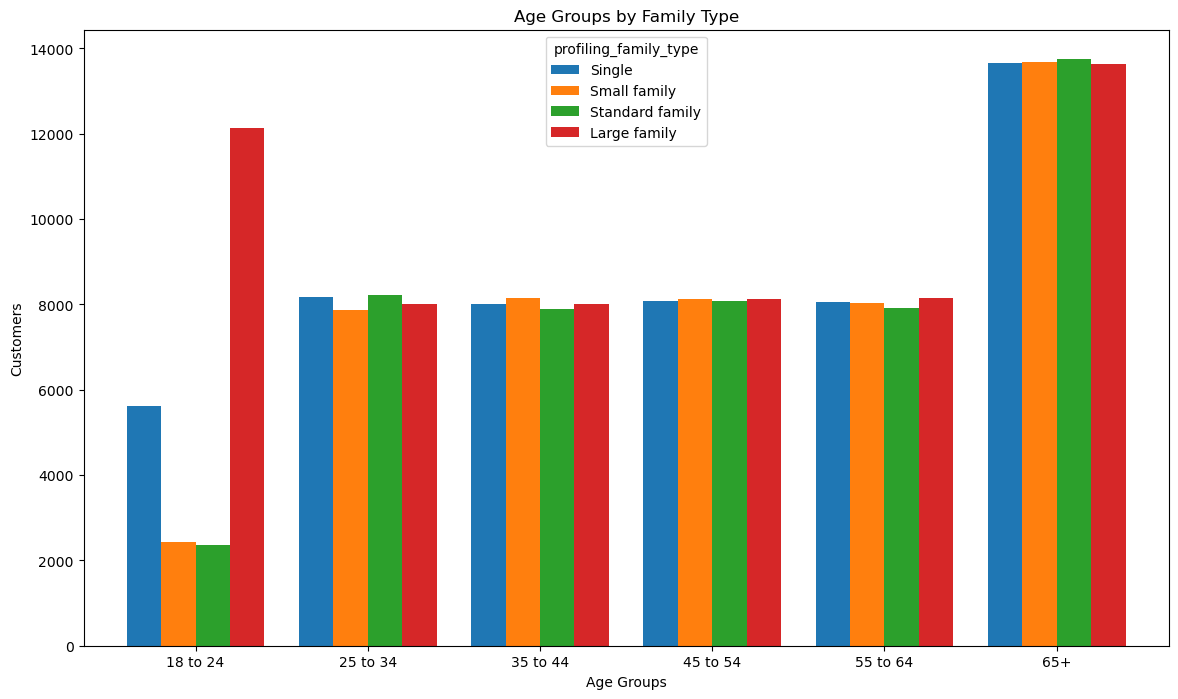

In [250]:
# Create the grouped bar chart
bar_grouped_users_age_family = ct_grouped_bar_chart.plot.bar(title = 'Age Groups by Family Type', xlabel = 'Age Groups', ylabel = 'Customers', rot=0, width=0.8, figsize=(14, 8))

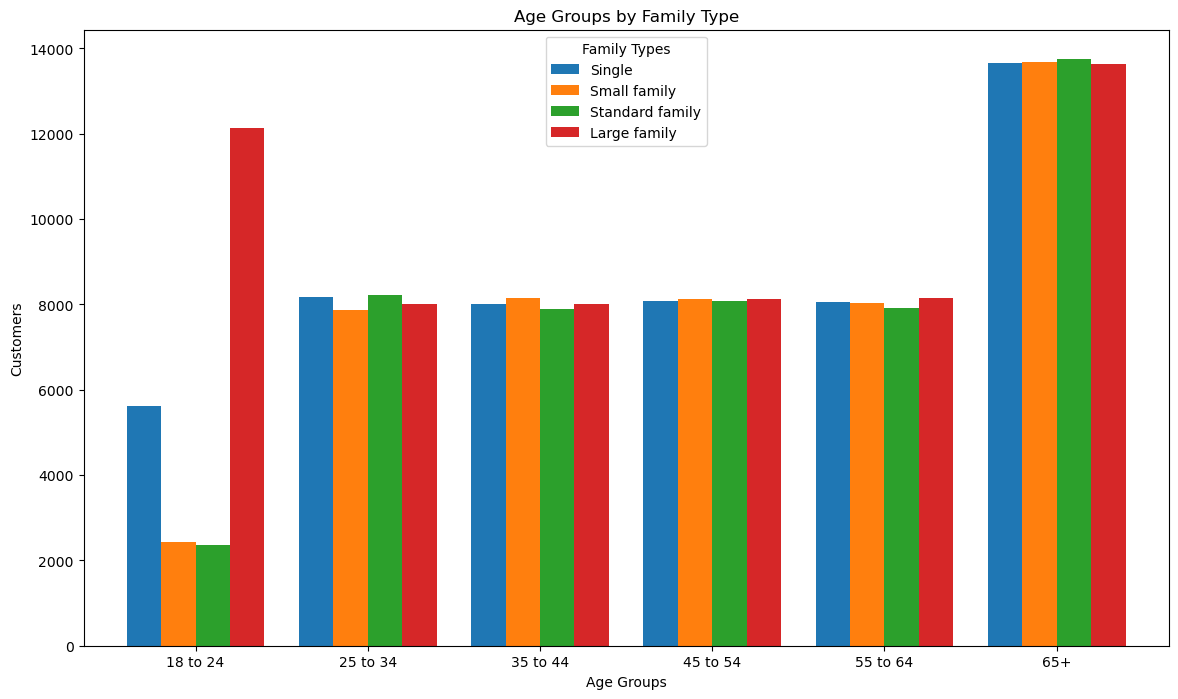

In [251]:
# Adjust the legend and labels
bar_grouped_users_age_family.legend(title='Family Types')
bar_grouped_users_age_family.figure

In [252]:
# Export plot as an image; Define the folder path and file name
folder_path = r'/Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/'
file_name = 'bar_grouped_users_age_family.png'

# Validate folder
os.makedirs(folder_path, exist_ok=True)

# Create the full file path
file_path = os.path.join(folder_path, '04 Analysis', 'Visualizations', file_name)

# Export the plot to an image file
bar_grouped_users_age_family.figure.savefig(file_path, bbox_inches='tight', dpi=300)
print(f'Plot exported to {file_path}')

Plot exported to /Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/04 Analysis/Visualizations/bar_grouped_users_age_family.png


#### 02. Income by Age Group

In [256]:
# Create a DataFrame, crosstab, and then grouped bar chart
# Create a crosstab with variable 'profiling_age' as rows and variable 'profiling_income' as columns
ct_grouped_bar_chart = pd.crosstab(index=df_profiling['profiling_age'], columns=df_profiling['profiling_income'])
ct_grouped_bar_chart

profiling_income,Lower class,Lower-middle class,Middle class,Upper class,Upper-middle class
profiling_age,,,,,
18 to 24,553,7136,12504,116,2251
25 to 34,866,10196,17764,173,3281
35 to 44,501,8254,12095,2076,9134
45 to 54,55,5582,3746,4832,18209
55 to 64,53,5484,3732,4649,18238
65+,71,9209,6421,8067,30961


In [257]:
# Set column order
column_order = ['Lower class', 'Lower-middle class', 'Middle class', 'Upper-middle class', 'Upper class']
ct_grouped_bar_chart = ct_grouped_bar_chart[column_order]
ct_grouped_bar_chart

profiling_income,Lower class,Lower-middle class,Middle class,Upper-middle class,Upper class
profiling_age,,,,,
18 to 24,553,7136,12504,2251,116
25 to 34,866,10196,17764,3281,173
35 to 44,501,8254,12095,9134,2076
45 to 54,55,5582,3746,18209,4832
55 to 64,53,5484,3732,18238,4649
65+,71,9209,6421,30961,8067


<Axes: title={'center': 'Age Groups by Income'}, xlabel='Age Groups', ylabel='Customers'>

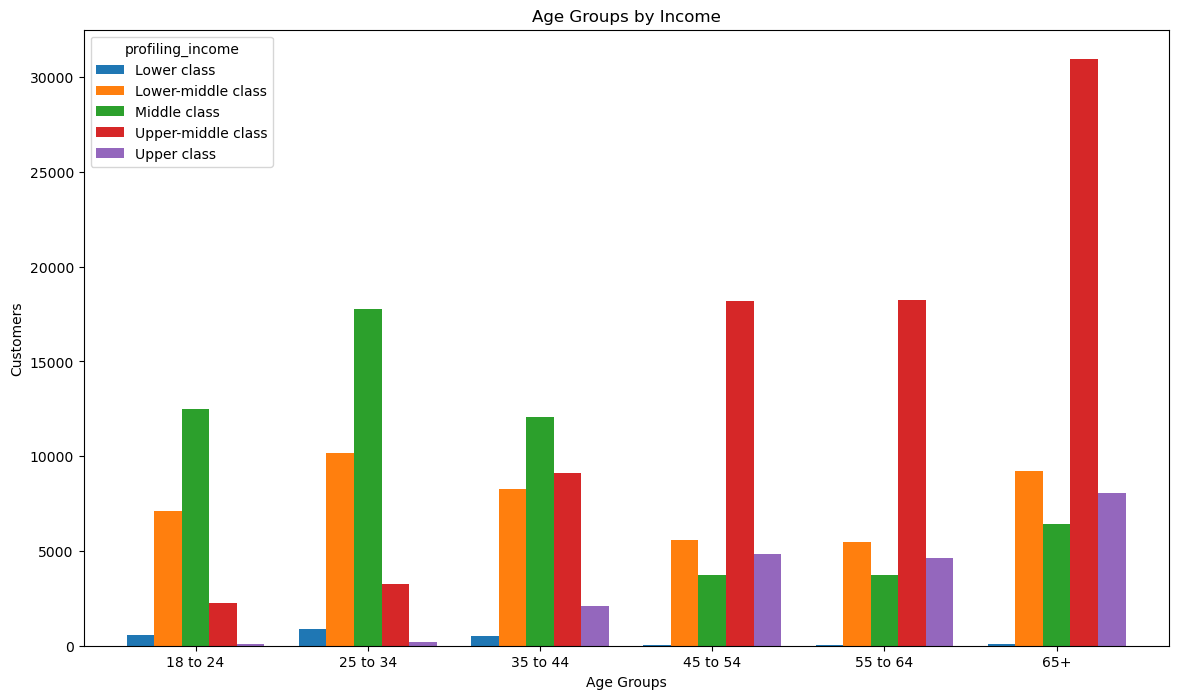

In [258]:
# Preview the grouped bar chart
ct_grouped_bar_chart.plot.bar(title = 'Age Groups by Income', xlabel = 'Age Groups', ylabel = 'Customers', rot=0, width=0.8, figsize=(14, 8))

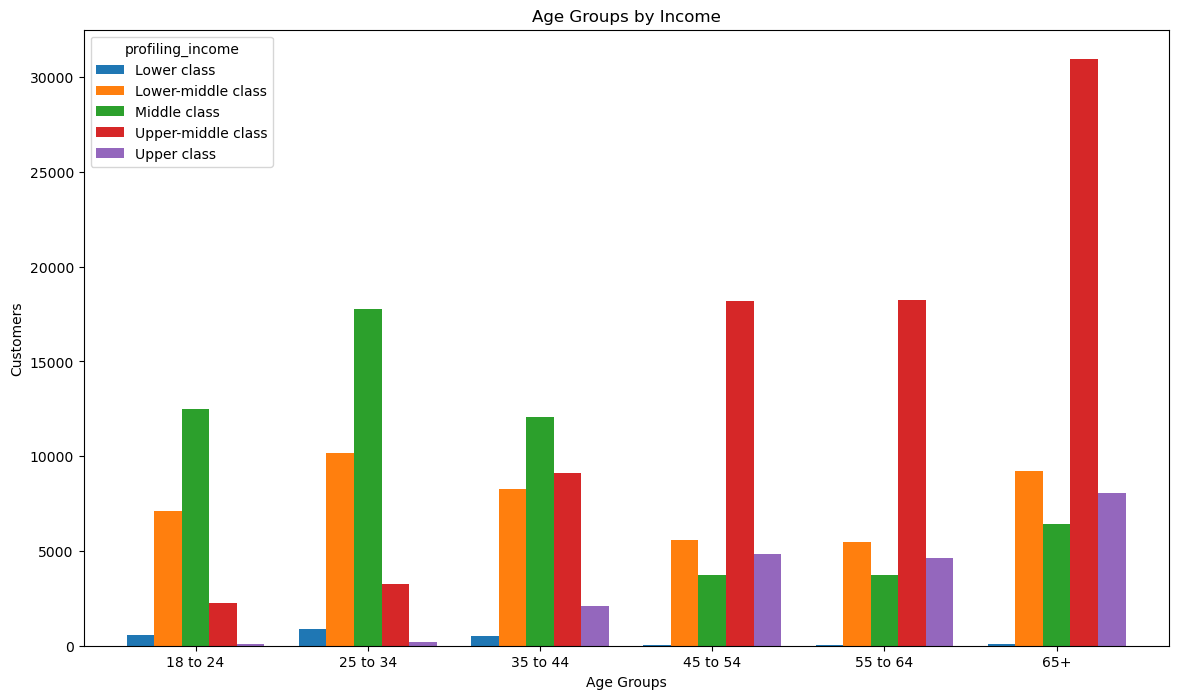

In [259]:
# Create the grouped bar chart
bar_grouped_users_age_income = ct_grouped_bar_chart.plot.bar(title = 'Age Groups by Income', xlabel = 'Age Groups', ylabel = 'Customers', rot=0, width=0.8, figsize=(14, 8))

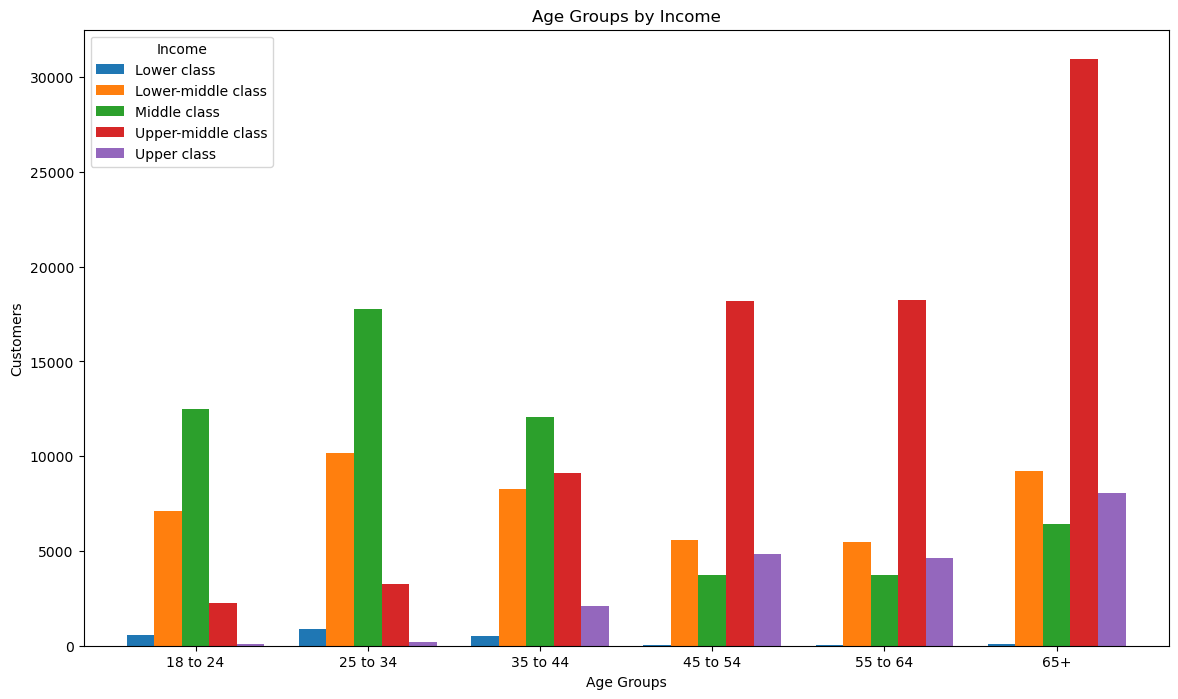

In [260]:
# Adjust the legend and labels
bar_grouped_users_age_income.legend(title='Income')
bar_grouped_users_age_income.figure

In [261]:
# Export plot as an image; Define the folder path and file name
folder_path = r'/Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/'
file_name = 'bar_grouped_users_age_income.png'

# Validate folder
os.makedirs(folder_path, exist_ok=True)

# Create the full file path
file_path = os.path.join(folder_path, '04 Analysis', 'Visualizations', file_name)

# Export the plot to an image file
bar_grouped_users_age_income.figure.savefig(file_path, bbox_inches='tight', dpi=300)
print(f'Plot exported to {file_path}')

Plot exported to /Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/04 Analysis/Visualizations/bar_grouped_users_age_income.png


#### 03. Income by Family Type

In [262]:
# Create a DataFrame, crosstab, and then grouped bar chart
# Create a crosstab with variable 'profiling_family_type' as rows and variable 'profiling_income' as columns
ct_grouped_bar_chart = pd.crosstab(index=df_profiling['profiling_family_type'], columns=df_profiling['profiling_income'])
ct_grouped_bar_chart

profiling_income,Lower class,Lower-middle class,Middle class,Upper class,Upper-middle class
profiling_family_type,,,,,
Large family,672,13469,17712,5075,21148
Single,539,11527,14025,4982,20529
Small family,436,10470,12224,4934,20243
Standard family,452,10395,12301,4922,20154


In [263]:
# Set column order
column_order = ['Lower class', 'Lower-middle class', 'Middle class', 'Upper-middle class', 'Upper class']
ct_grouped_bar_chart = ct_grouped_bar_chart[column_order]
ct_grouped_bar_chart

profiling_income,Lower class,Lower-middle class,Middle class,Upper-middle class,Upper class
profiling_family_type,,,,,
Large family,672,13469,17712,21148,5075
Single,539,11527,14025,20529,4982
Small family,436,10470,12224,20243,4934
Standard family,452,10395,12301,20154,4922


In [264]:
# Set row order
row_order = ['Single', 'Small family', 'Standard family', 'Large family']
ct_grouped_bar_chart = ct_grouped_bar_chart.reindex(row_order)
ct_grouped_bar_chart

profiling_income,Lower class,Lower-middle class,Middle class,Upper-middle class,Upper class
profiling_family_type,,,,,
Single,539,11527,14025,20529,4982
Small family,436,10470,12224,20243,4934
Standard family,452,10395,12301,20154,4922
Large family,672,13469,17712,21148,5075


<Axes: title={'center': 'Family Type by Income'}, xlabel='Family Type', ylabel='Customers'>

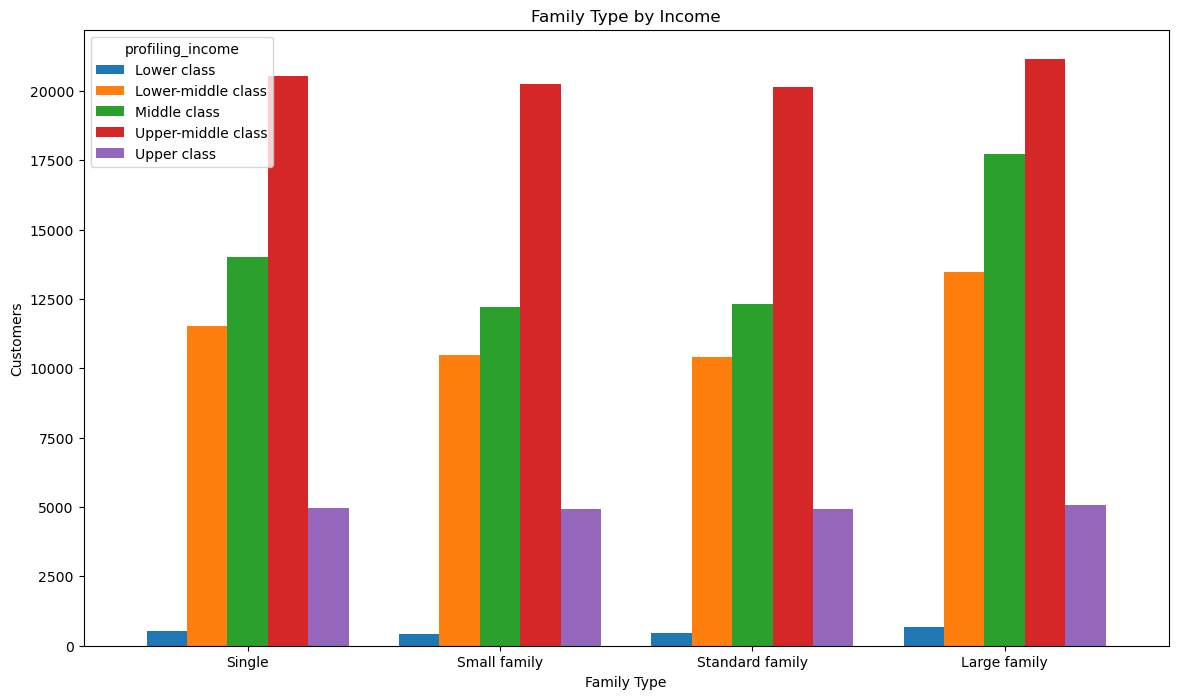

In [265]:
# Preview the grouped bar chart
ct_grouped_bar_chart.plot.bar(title = 'Family Type by Income', xlabel = 'Family Type', ylabel = 'Customers', rot=0, width=0.8, figsize=(14, 8))

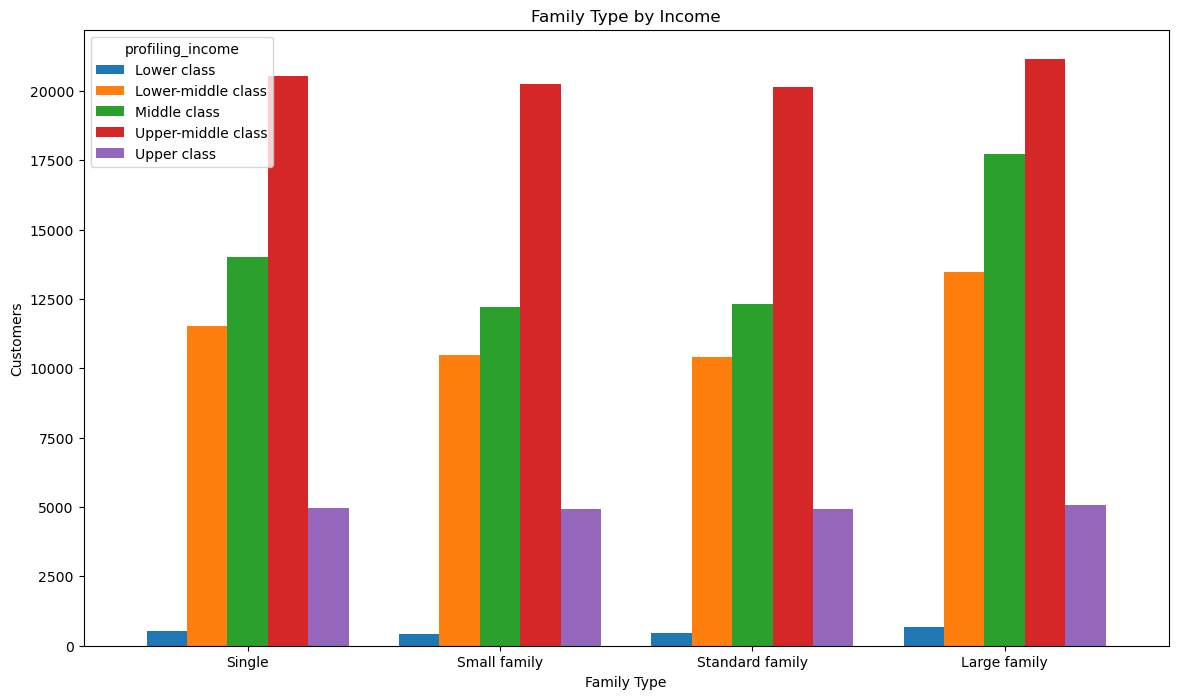

In [266]:
# Create the grouped bar chart
bar_grouped_users_family_income = ct_grouped_bar_chart.plot.bar(title = 'Family Type by Income', xlabel = 'Family Type', ylabel = 'Customers', rot=0, width=0.8, figsize=(14, 8))

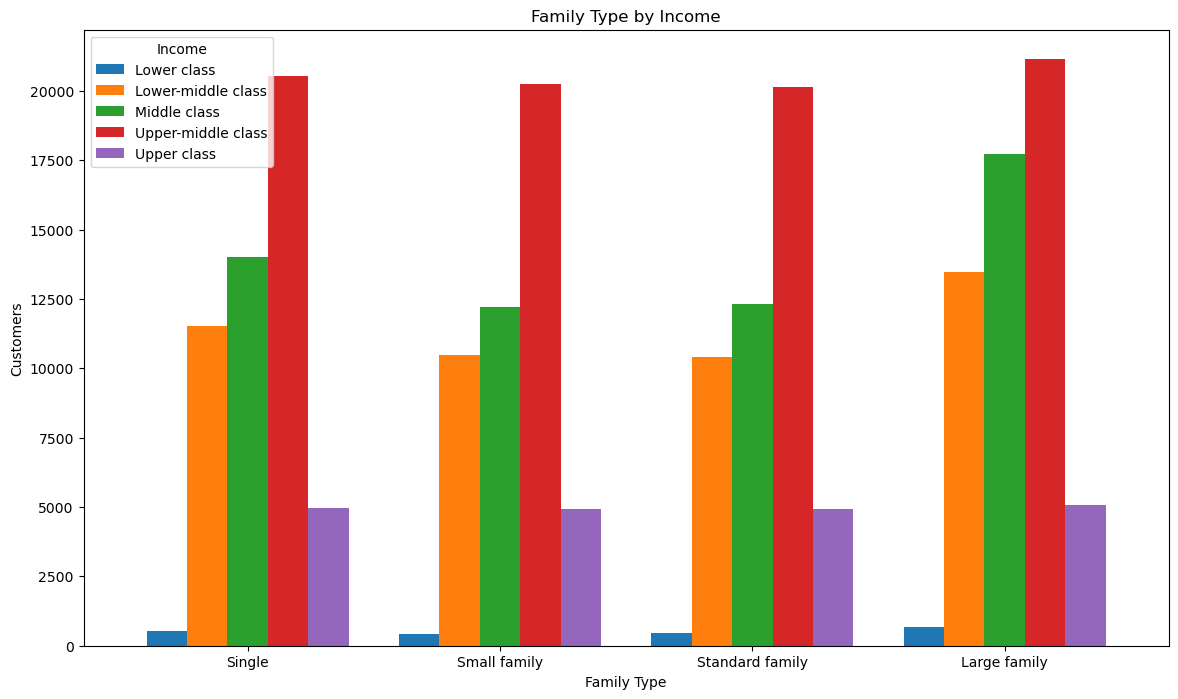

In [267]:
# Adjust the legend and labels
bar_grouped_users_family_income.legend(title='Income')
bar_grouped_users_family_income.figure

In [268]:
# Export plot as an image; Define the folder path and file name
folder_path = r'/Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/'
file_name = 'bar_grouped_users_family_income.png'

# Validate folder
os.makedirs(folder_path, exist_ok=True)

# Create the full file path
file_path = os.path.join(folder_path, '04 Analysis', 'Visualizations', file_name)

# Export the plot to an image file
bar_grouped_users_family_income.figure.savefig(file_path, bbox_inches='tight', dpi=300)
print(f'Plot exported to {file_path}')

Plot exported to /Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/04 Analysis/Visualizations/bar_grouped_users_family_income.png


### 07. Customer Profiles Vs Regions and Departments

#### 01. Age Profiles

In [58]:
# Preview a normalized crosstab of variable 'region' vs. variable 'profiling_age'.
pd.crosstab(df_merged['profiling_age'], df_merged['region'], normalize='index', dropna = False)

region,Midwest,Northeast,South,West
profiling_age,,,,
18 to 24,0.231619,0.176469,0.340962,0.250949
25 to 34,0.232450,0.179085,0.332372,0.256093
35 to 44,0.239393,0.168760,0.338786,0.253061
45 to 54,0.236931,0.178670,0.324663,0.259736
55 to 64,0.234844,0.172177,0.334667,0.258312
65+,0.232136,0.181226,0.330757,0.255881


In [59]:
# Create the normalized crosstab.
ct_region_age = pd.crosstab(df_merged['profiling_age'], df_merged['region'], normalize='index', dropna = False)
ct_region_age

region,Midwest,Northeast,South,West
profiling_age,,,,
18 to 24,0.231619,0.176469,0.340962,0.250949
25 to 34,0.232450,0.179085,0.332372,0.256093
35 to 44,0.239393,0.168760,0.338786,0.253061
45 to 54,0.236931,0.178670,0.324663,0.259736
55 to 64,0.234844,0.172177,0.334667,0.258312
65+,0.232136,0.181226,0.330757,0.255881


/var/folders/3j/v2m3l9zn34b54kd8m0lcnww40000gn/T/ipykernel_55411/4121099036.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_position = bottom[j] - (value * 100 / 2)


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Age Groups by Region'}, xlabel='Age Groups', ylabel='Percentages'>)

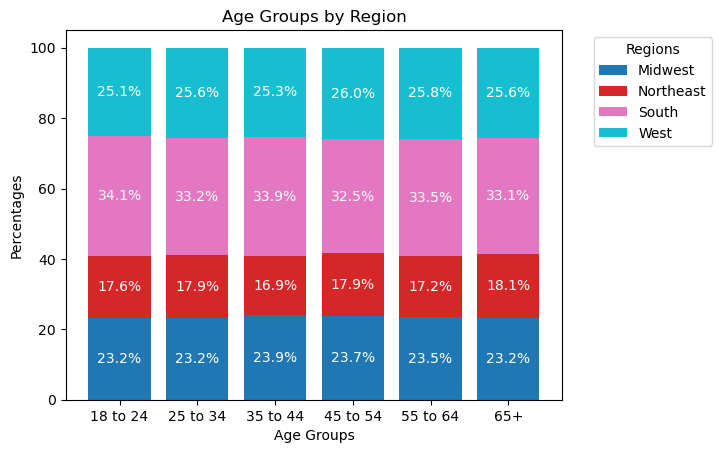

In [60]:
# Preview the stacked bar chart.
create_stacked_bar_chart(ct_region_age, title='Age Groups by Region', y_label='Percentages', x_label='Age Groups', legend_title='Regions')

/var/folders/3j/v2m3l9zn34b54kd8m0lcnww40000gn/T/ipykernel_55411/4121099036.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_position = bottom[j] - (value * 100 / 2)


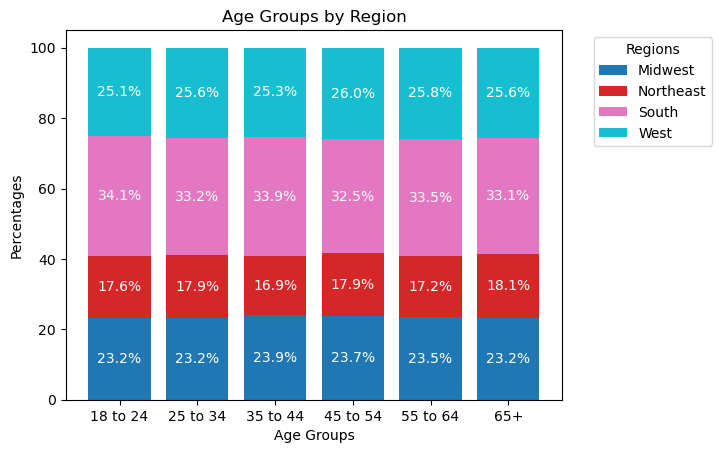

In [61]:
# Create the stacked bar chart.
fig, ax = create_stacked_bar_chart(ct_region_age, title='Age Groups by Region', y_label='Percentages', x_label='Age Groups', legend_title='Regions')
stacked_bar_region_age = fig

In [62]:
# Export plot as an image; Define the folder path and file name
folder_path = r'/Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/'
file_name = 'stacked_bar_region_age.png'

# Validate folder
os.makedirs(folder_path, exist_ok=True)

# Create the full file path
file_path = os.path.join(folder_path, '04 Analysis', 'Visualizations', file_name)

# Export the plot to an image file
stacked_bar_region_age.figure.savefig(file_path)

print(f'Plot exported to {file_path}')

Plot exported to /Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/04 Analysis/Visualizations/stacked_bar_region_age.png


In [63]:
# Create a filter, DataFrame, crosstab, and then grouped bar chart
# Identify the top 5 values of variable 'department_name' by count
filter_top_values = df_merged['department_name'].value_counts().nlargest(5).index

# Create a DataFrame of records with the top values
df_filtered = df_merged[df_merged['department_name'].isin(filter_top_values)]

# Create a crosstab with variable 'profiling_age' as rows and variable 'department_name' as columns
ct_grouped_bar_chart = pd.crosstab(index=df_filtered['profiling_age'], columns=df_filtered['department_name'])
ct_grouped_bar_chart

department_name,beverages,dairy eggs,frozen,produce,snacks
profiling_age,,,,,
18 to 24,292004,597035,246369,1043171,316553
25 to 34,416097,848269,345443,1477061,455951
35 to 44,414230,845477,346511,1489820,448773
45 to 54,428696,849262,355011,1486613,456118
55 to 64,422264,832491,347740,1468863,449640
65+,714832,1426213,593669,2513763,760515


In [65]:
# Set column order
column_order = ['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen']
ct_grouped_bar_chart = ct_grouped_bar_chart[column_order]
ct_grouped_bar_chart

department_name,produce,dairy eggs,snacks,beverages,frozen
profiling_age,,,,,
18 to 24,1043171,597035,316553,292004,246369
25 to 34,1477061,848269,455951,416097,345443
35 to 44,1489820,845477,448773,414230,346511
45 to 54,1486613,849262,456118,428696,355011
55 to 64,1468863,832491,449640,422264,347740
65+,2513763,1426213,760515,714832,593669


<Axes: title={'center': 'Top 5 Department Orders by Age Group'}, xlabel='Age Groups', ylabel='Orders in Millions'>

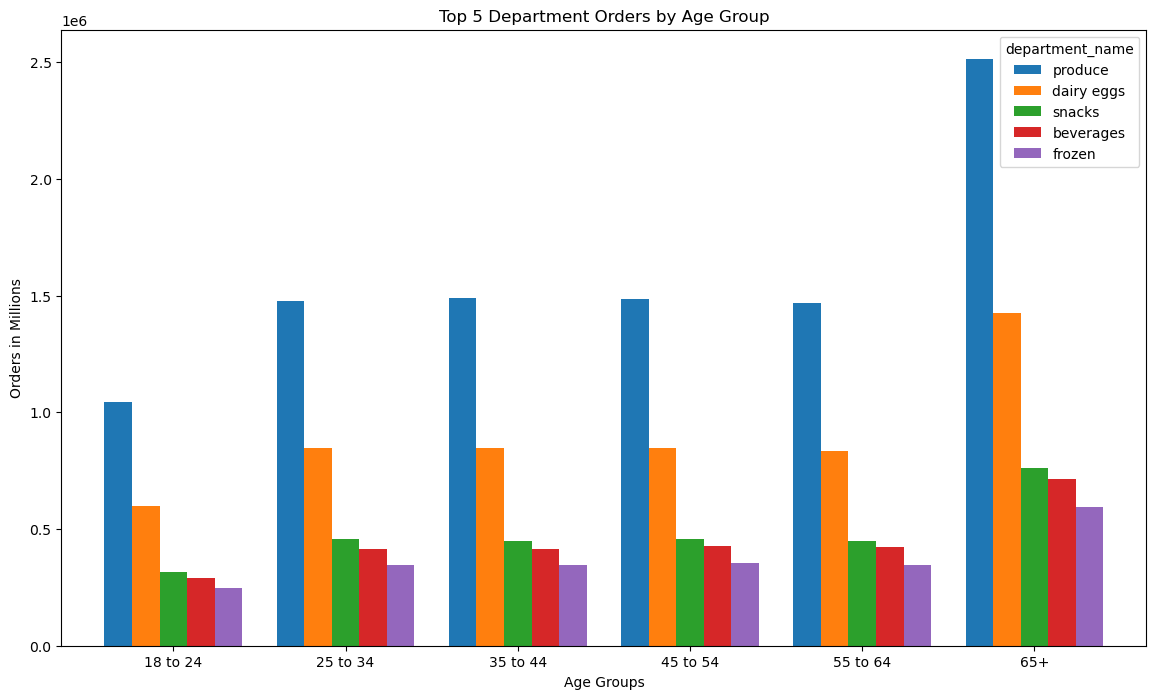

In [66]:
# Preview the grouped bar chart
ct_grouped_bar_chart.plot.bar(title = 'Top 5 Department Orders by Age Group', xlabel = 'Age Groups', ylabel = 'Orders in Millions', rot=0, width=0.8, figsize=(14, 8))

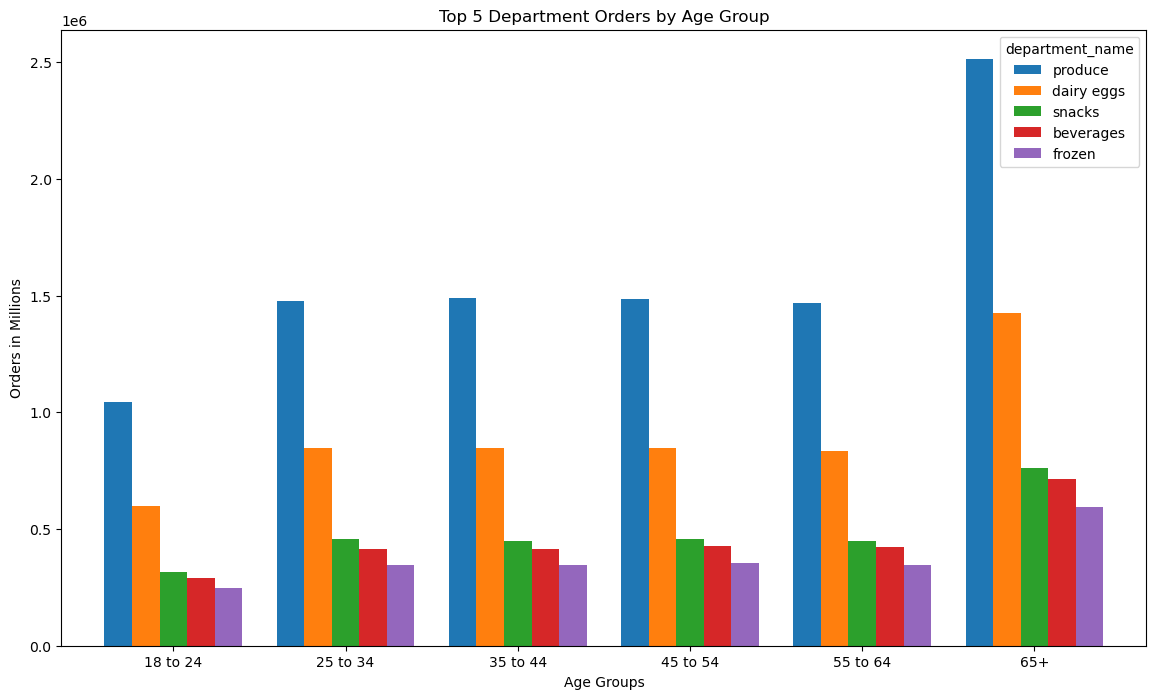

In [67]:
# Create the grouped bar chart
bar_grouped_age_department = ct_grouped_bar_chart.plot.bar(title = 'Top 5 Department Orders by Age Group', xlabel = 'Age Groups', ylabel = 'Orders in Millions', rot=0, width=0.8, figsize=(14, 8))

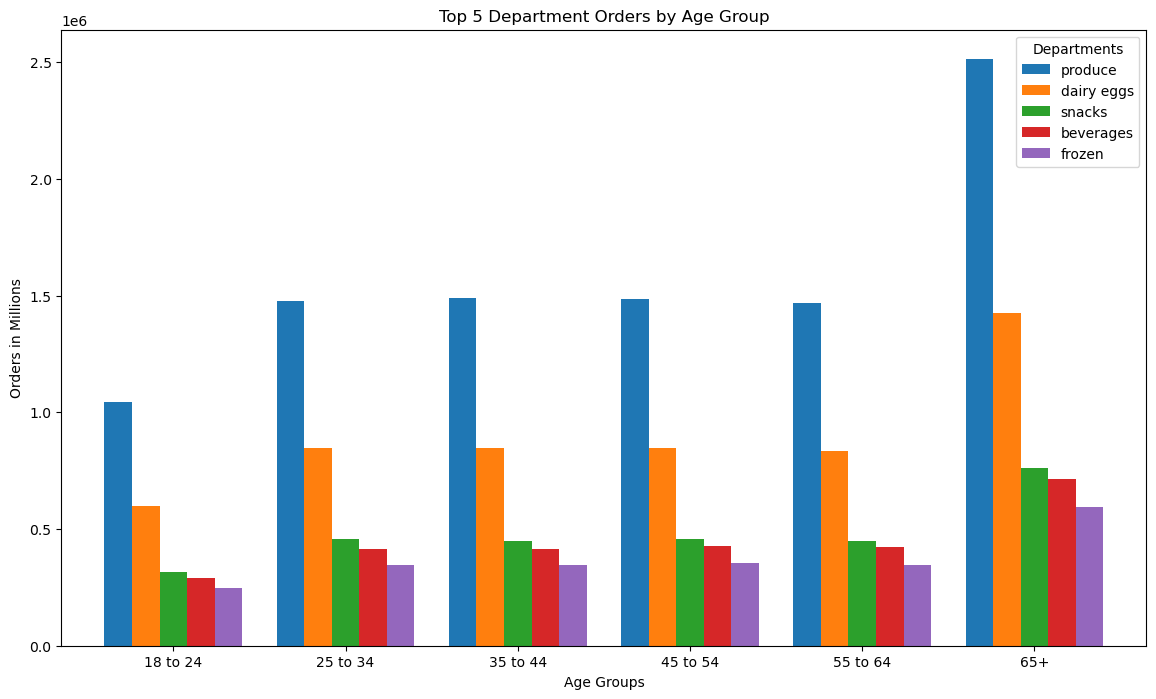

In [68]:
# Adjust the legend
bar_grouped_age_department.legend(title='Departments')
bar_grouped_age_department.figure

In [69]:
# Export plot as an image; Define the folder path and file name
folder_path = r'/Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/'
file_name = 'bar_grouped_age_department.png'

# Validate folder
os.makedirs(folder_path, exist_ok=True)

# Create the full file path
file_path = os.path.join(folder_path, '04 Analysis', 'Visualizations', file_name)

# Export the plot to an image file
bar_grouped_age_department.figure.savefig(file_path)

print(f'Plot exported to {file_path}')

Plot exported to /Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/04 Analysis/Visualizations/bar_grouped_age_department.png


#### 02. Income Profiles

In [70]:
# Preview a normalized crosstab of variable 'region' vs. variable 'profiling_age'.
pd.crosstab(df_merged['profiling_income'], df_merged['region'], normalize='index', dropna = False)

region,Midwest,Northeast,South,West
profiling_income,,,,
Lower class,0.271951,0.170841,0.336305,0.220902
Lower-middle class,0.227903,0.177011,0.339960,0.255126
Middle class,0.232431,0.174188,0.334891,0.258490
Upper class,0.235827,0.173996,0.331758,0.258418
Upper-middle class,0.237471,0.178879,0.329309,0.254340


In [71]:
# Create the normalized crosstab.
ct_region_age = pd.crosstab(df_merged['profiling_income'], df_merged['region'], normalize='index', dropna = False)
ct_region_age

region,Midwest,Northeast,South,West
profiling_income,,,,
Lower class,0.271951,0.170841,0.336305,0.220902
Lower-middle class,0.227903,0.177011,0.339960,0.255126
Middle class,0.232431,0.174188,0.334891,0.258490
Upper class,0.235827,0.173996,0.331758,0.258418
Upper-middle class,0.237471,0.178879,0.329309,0.254340


/var/folders/3j/v2m3l9zn34b54kd8m0lcnww40000gn/T/ipykernel_55411/4121099036.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_position = bottom[j] - (value * 100 / 2)


(<Figure size 800x480 with 1 Axes>,
 <Axes: title={'center': 'Income Groups by Region'}, xlabel='Income Groups', ylabel='Percentages'>)

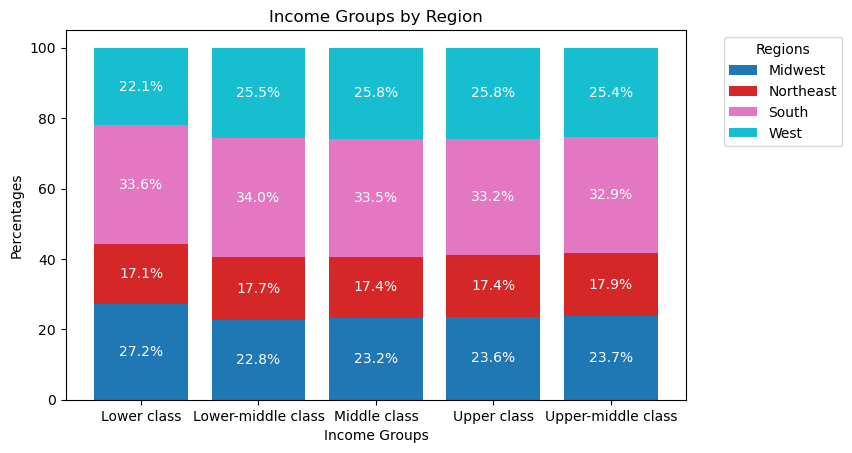

In [72]:
# Preview the stacked bar chart.
create_stacked_bar_chart(ct_region_age, title='Income Groups by Region', y_label='Percentages', x_label='Income Groups', legend_title='Regions', width=8)

/var/folders/3j/v2m3l9zn34b54kd8m0lcnww40000gn/T/ipykernel_55411/4121099036.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_position = bottom[j] - (value * 100 / 2)


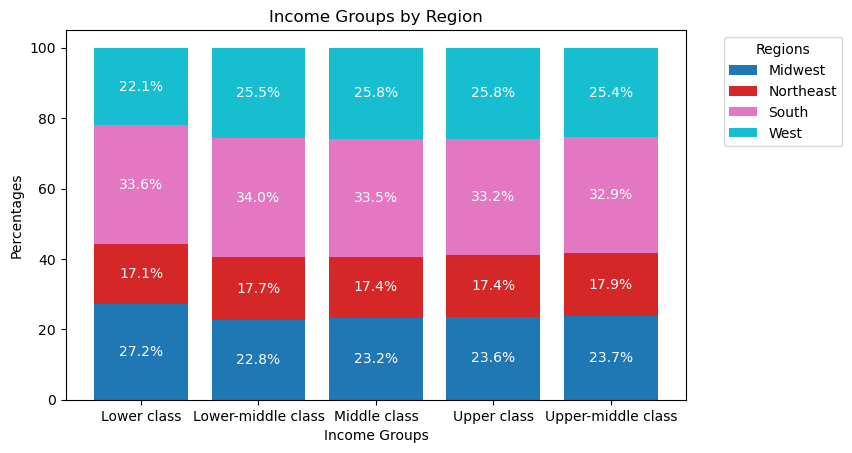

In [73]:
# Create the stacked bar chart.
fig, ax = create_stacked_bar_chart(ct_region_age, title='Income Groups by Region', y_label='Percentages', x_label='Income Groups', legend_title='Regions', width=8)
stacked_bar_income_region = fig

In [74]:
# Export plot as an image; Define the folder path and file name
folder_path = r'/Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/'
file_name = 'stacked_bar_region_age.png'

# Validate folder
os.makedirs(folder_path, exist_ok=True)

# Create the full file path
file_path = os.path.join(folder_path, '04 Analysis', 'Visualizations', file_name)

# Export the plot to an image file
stacked_bar_income_region.figure.savefig(file_path)
print(f'Plot exported to {file_path}')

Plot exported to /Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/04 Analysis/Visualizations/stacked_bar_region_age.png


In [75]:
# Create a filter, DataFrame, crosstab, and then grouped bar chart
# Identify the top 5 values of variable 'department_name' by count
filter_top_values = df_merged['department_name'].value_counts().nlargest(5).index

# Create a DataFrame of records with the top values
df_filtered = df_merged[df_merged['department_name'].isin(filter_top_values)]

# Create a crosstab with variable 'profiling_income' as rows and variable 'department_name' as columns
ct_grouped_bar_chart = pd.crosstab(index=df_filtered['profiling_income'], columns=df_filtered['department_name'])
ct_grouped_bar_chart

department_name,beverages,dairy eggs,frozen,produce,snacks
profiling_income,,,,,
Lower class,24717,30289,13824,49187,36654
Lower-middle class,554554,834503,355546,1416812,764564
Middle class,742146,1610152,658073,2861741,750187
Upper class,282650,590820,248829,1010796,273260
Upper-middle class,1084056,2332983,958471,4140755,1062885


In [76]:
# Set column order
column_order = ['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen']
ct_grouped_bar_chart = ct_grouped_bar_chart[column_order]
ct_grouped_bar_chart

department_name,produce,dairy eggs,snacks,beverages,frozen
profiling_income,,,,,
Lower class,49187,30289,36654,24717,13824
Lower-middle class,1416812,834503,764564,554554,355546
Middle class,2861741,1610152,750187,742146,658073
Upper class,1010796,590820,273260,282650,248829
Upper-middle class,4140755,2332983,1062885,1084056,958471


In [77]:
# Set row order
row_order = ['Lower class', 'Lower-middle class', 'Middle class', 'Upper-middle class', 'Upper class']
ct_grouped_bar_chart = ct_grouped_bar_chart.reindex(row_order)
ct_grouped_bar_chart

department_name,produce,dairy eggs,snacks,beverages,frozen
profiling_income,,,,,
Lower class,49187,30289,36654,24717,13824
Lower-middle class,1416812,834503,764564,554554,355546
Middle class,2861741,1610152,750187,742146,658073
Upper-middle class,4140755,2332983,1062885,1084056,958471
Upper class,1010796,590820,273260,282650,248829


<Axes: title={'center': 'Top 5 Department Orders by Income Group'}, xlabel='Income Groups', ylabel='Orders in Millions'>

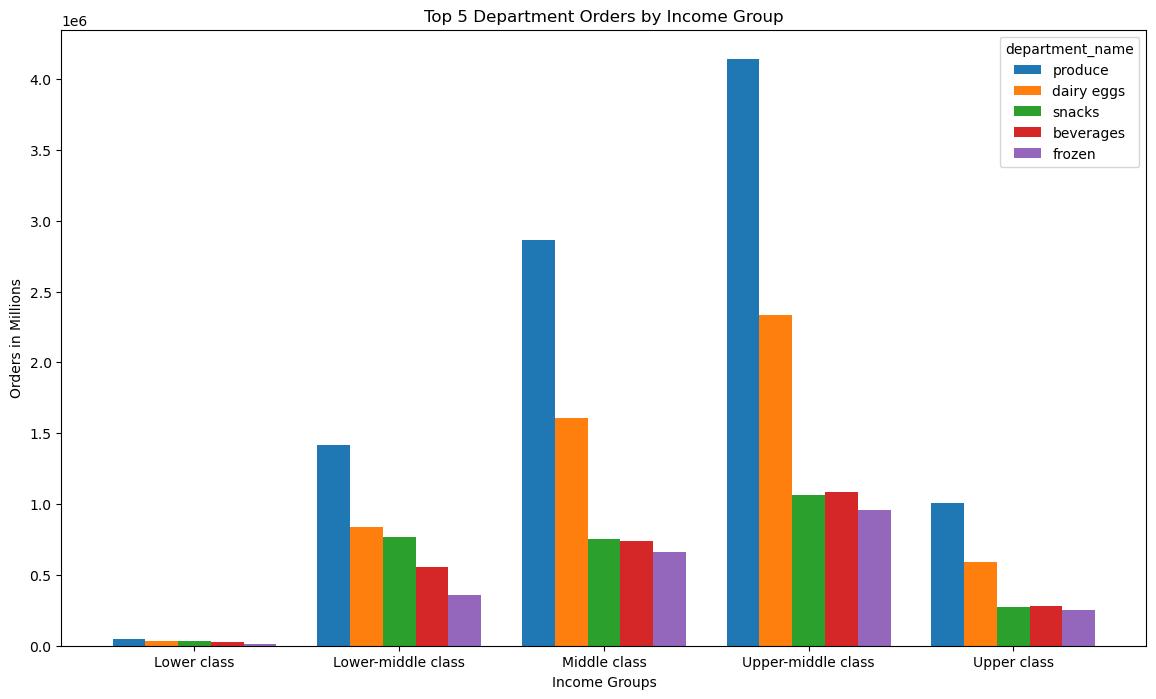

In [78]:
# Preview the grouped bar chart
ct_grouped_bar_chart.plot.bar(title = 'Top 5 Department Orders by Income Group', xlabel = 'Income Groups', ylabel = 'Orders in Millions', rot=0, width=0.8, figsize=(14, 8))

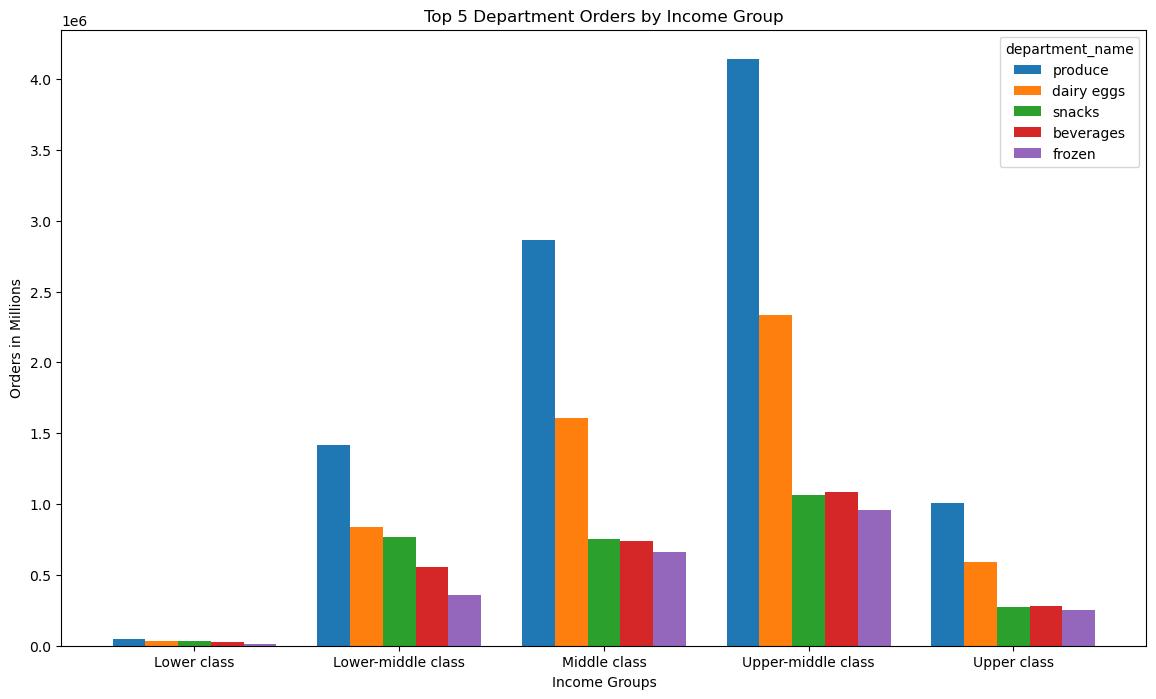

In [79]:
# Create the grouped bar chart
bar_grouped_income_department = ct_grouped_bar_chart.plot.bar(title = 'Top 5 Department Orders by Income Group', xlabel = 'Income Groups', ylabel = 'Orders in Millions', rot=0, width=0.8, figsize=(14, 8))

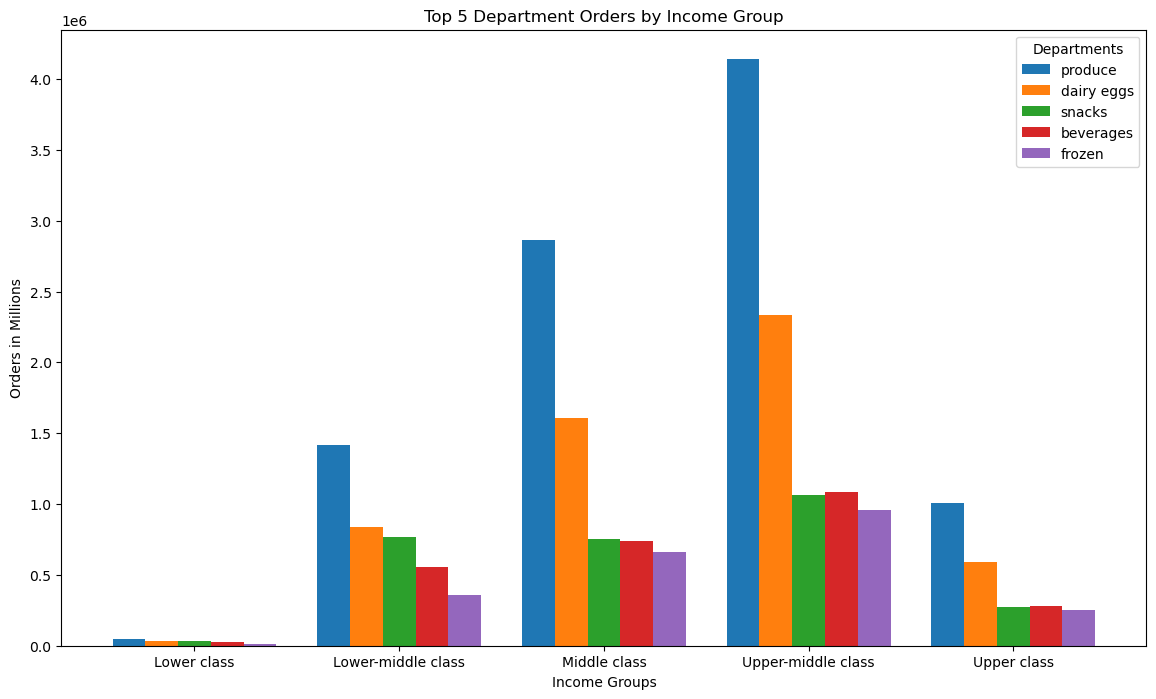

In [80]:
# Adjust the legend and labels
bar_grouped_income_department.legend(title='Departments')
bar_grouped_income_department.set_xlabel('Income Groups')
bar_grouped_income_department.figure

In [81]:
# Export plot as an image; Define the folder path and file name
folder_path = r'/Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/'
file_name = 'bar_grouped_income_department.png'

# Validate folder
os.makedirs(folder_path, exist_ok=True)

# Create the full file path
file_path = os.path.join(folder_path, '04 Analysis', 'Visualizations', file_name)

# Export the plot to an image file
bar_grouped_income_department.figure.savefig(file_path)

print(f'Plot exported to {file_path}')

Plot exported to /Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/04 Analysis/Visualizations/bar_grouped_income_department.png


#### 03. Family Type Profiles

In [82]:
# Preview a normalized crosstab of variable 'region' vs. variable 'profiling_family_type'.
pd.crosstab(df_merged['profiling_family_type'], df_merged['region'], normalize='index', dropna = False)

region,Midwest,Northeast,South,West
profiling_family_type,,,,
Large family,0.231088,0.176600,0.334454,0.257858
Single,0.235275,0.175158,0.333644,0.255924
Small family,0.238365,0.178966,0.328559,0.254111
Standard family,0.233688,0.175839,0.335121,0.255352


In [83]:
# Create the normalized crosstab.
ct_region_age = pd.crosstab(df_merged['profiling_family_type'], df_merged['region'], normalize='index', dropna = False)
ct_region_age

region,Midwest,Northeast,South,West
profiling_family_type,,,,
Large family,0.231088,0.176600,0.334454,0.257858
Single,0.235275,0.175158,0.333644,0.255924
Small family,0.238365,0.178966,0.328559,0.254111
Standard family,0.233688,0.175839,0.335121,0.255352


/var/folders/3j/v2m3l9zn34b54kd8m0lcnww40000gn/T/ipykernel_55411/4121099036.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_position = bottom[j] - (value * 100 / 2)


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Family Types by Region'}, xlabel='Family Types', ylabel='Percentages'>)

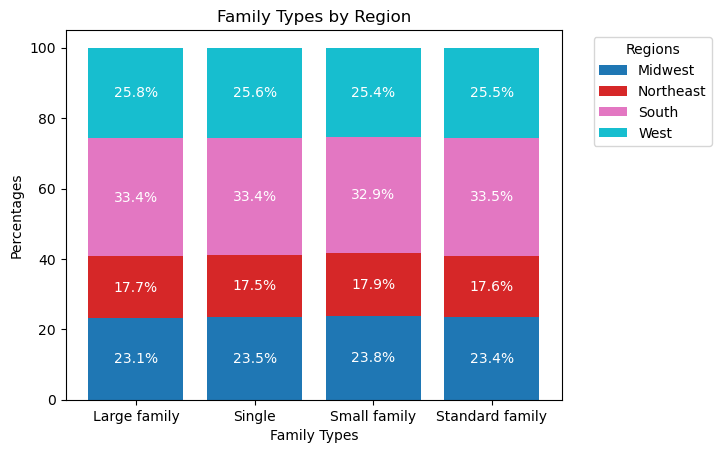

In [84]:
# Preview the stacked bar chart.
create_stacked_bar_chart(ct_region_age, title='Family Types by Region', y_label='Percentages', x_label='Family Types', legend_title='Regions')

/var/folders/3j/v2m3l9zn34b54kd8m0lcnww40000gn/T/ipykernel_55411/4121099036.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_position = bottom[j] - (value * 100 / 2)


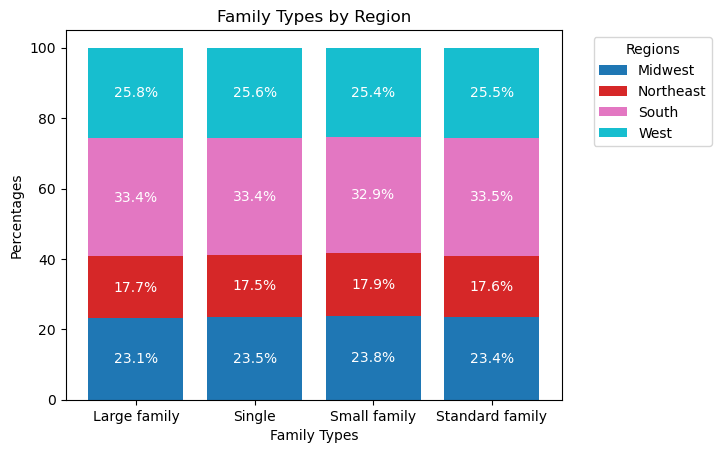

In [85]:
# Create the stacked bar chart.
fig, ax = create_stacked_bar_chart(ct_region_age, title='Family Types by Region', y_label='Percentages', x_label='Family Types', legend_title='Regions')
stacked_bar_family_type_region = fig

In [86]:
# Export plot as an image; Define the folder path and file name
folder_path = r'/Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/'
file_name = 'stacked_bar_family_type_region.png'

# Validate folder
os.makedirs(folder_path, exist_ok=True)

# Create the full file path
file_path = os.path.join(folder_path, '04 Analysis', 'Visualizations', file_name)

# Export the plot to an image file
stacked_bar_family_type_region.figure.savefig(file_path)
print(f'Plot exported to {file_path}')

Plot exported to /Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/04 Analysis/Visualizations/stacked_bar_family_type_region.png


In [87]:
# Create a filter, DataFrame, crosstab, and then grouped bar chart
# Identify the top 5 values of variable 'department_name' by count
filter_top_values = df_merged['department_name'].value_counts().nlargest(5).index

# Create a DataFrame of records with the top values
df_filtered = df_merged[df_merged['department_name'].isin(filter_top_values)]

# Create a crosstab with variable 'profiling_income' as rows and variable 'department_name' as columns
ct_grouped_bar_chart = pd.crosstab(index=df_filtered['profiling_family_type'], columns=df_filtered['department_name'])
ct_grouped_bar_chart

department_name,beverages,dairy eggs,frozen,produce,snacks
profiling_family_type,,,,,
Large family,754129,1525371,633956,2688599,815787
Single,674442,1349362,557160,2375445,720798
Small family,625544,1263538,517244,2205577,672136
Standard family,634008,1260476,526383,2209670,678829


In [88]:
# Set column order
column_order = ['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen']
ct_grouped_bar_chart = ct_grouped_bar_chart[column_order]
ct_grouped_bar_chart

department_name,produce,dairy eggs,snacks,beverages,frozen
profiling_family_type,,,,,
Large family,2688599,1525371,815787,754129,633956
Single,2375445,1349362,720798,674442,557160
Small family,2205577,1263538,672136,625544,517244
Standard family,2209670,1260476,678829,634008,526383


In [89]:
# Set row order
row_order = ['Single', 'Small family', 'Standard family', 'Large family']
ct_grouped_bar_chart = ct_grouped_bar_chart.reindex(row_order)
ct_grouped_bar_chart

department_name,produce,dairy eggs,snacks,beverages,frozen
profiling_family_type,,,,,
Single,2375445,1349362,720798,674442,557160
Small family,2205577,1263538,672136,625544,517244
Standard family,2209670,1260476,678829,634008,526383
Large family,2688599,1525371,815787,754129,633956


<Axes: title={'center': 'Top 5 Department Orders by Family Type'}, xlabel='Family Types', ylabel='Orders in Millions'>

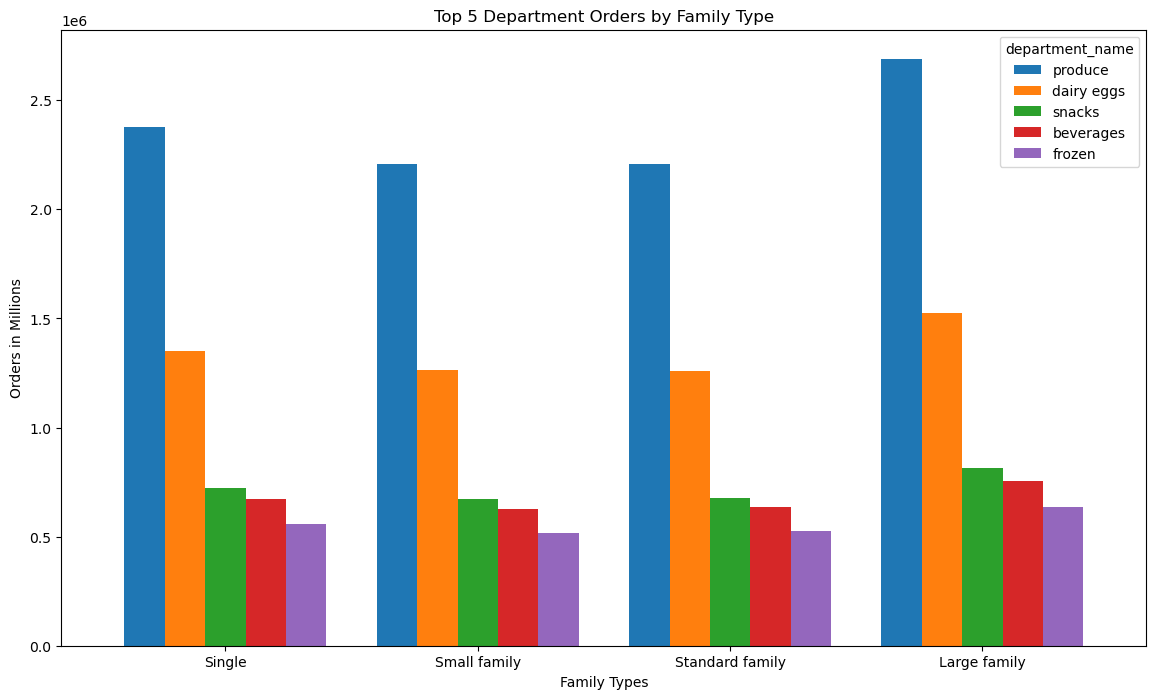

In [90]:
# Preview the grouped bar chart
ct_grouped_bar_chart.plot.bar(title = 'Top 5 Department Orders by Family Type', xlabel = 'Family Types', ylabel = 'Orders in Millions', rot=0, width=0.8, figsize=(14, 8))

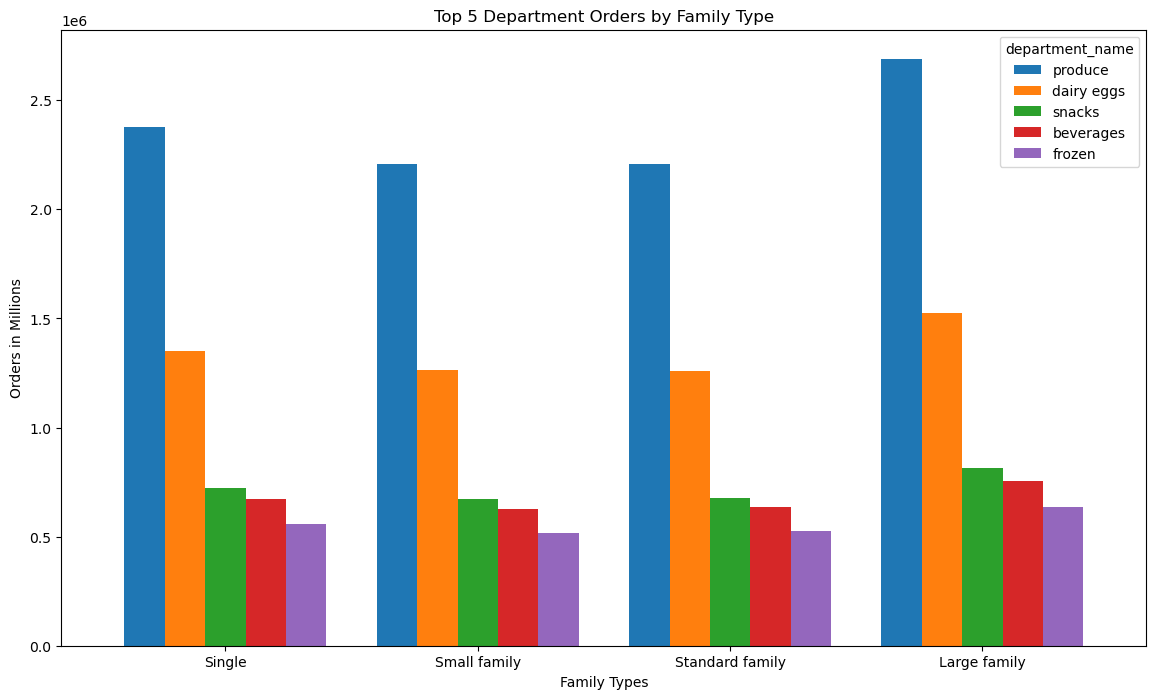

In [91]:
# Create the grouped bar chart
bar_grouped_family_department = ct_grouped_bar_chart.plot.bar(title = 'Top 5 Department Orders by Family Type', xlabel = 'Family Types', ylabel = 'Orders in Millions', rot=0, width=0.8, figsize=(14, 8))

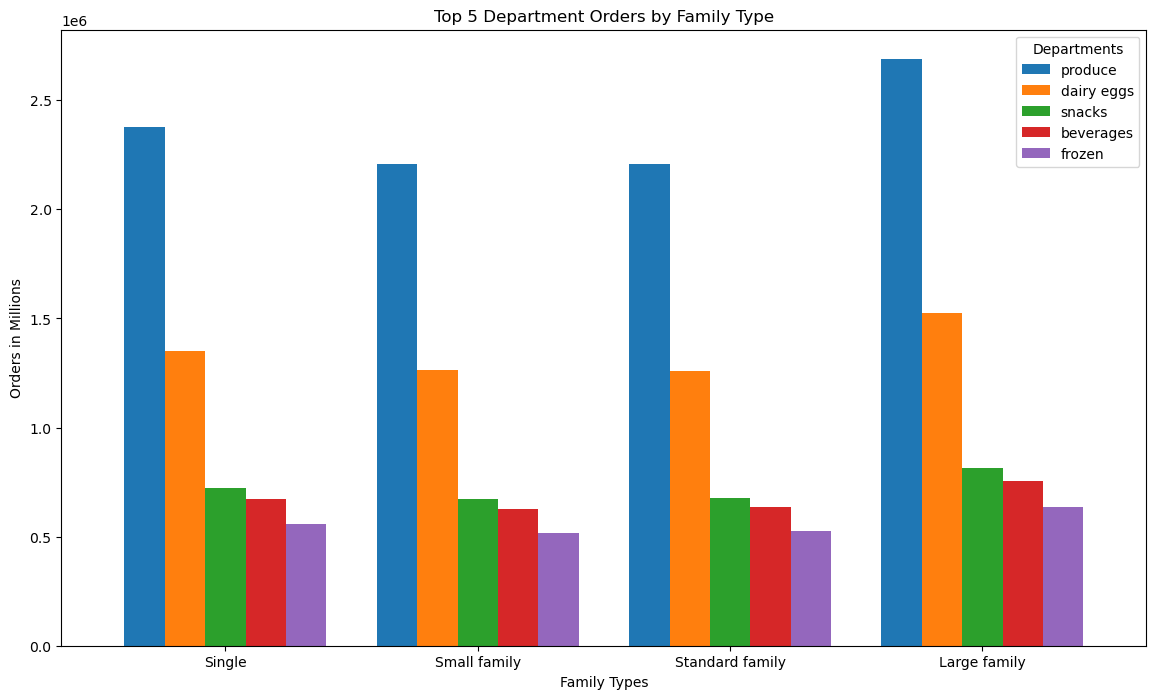

In [92]:
# Adjust the legend and labels
bar_grouped_family_department.legend(title='Departments')
bar_grouped_family_department.figure

In [93]:
# Export plot as an image; Define the folder path and file name
folder_path = r'/Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/'
file_name = 'bar_grouped_family_department.png'

# Validate folder
os.makedirs(folder_path, exist_ok=True)

# Create the full file path
file_path = os.path.join(folder_path, '04 Analysis', 'Visualizations', file_name)

# Export the plot to an image file
bar_grouped_family_department.figure.savefig(file_path)

print(f'Plot exported to {file_path}')

Plot exported to /Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/04 Analysis/Visualizations/bar_grouped_family_department.png


### 08. Regional Analysis

In [201]:
# Group by user_id and calculate the total number of purchases for each user
user_purchases = df_merged.groupby('user_id').size().reset_index(name='total_purchases')

In [202]:
# Merge grouped data with region
user_region = df_merged[['user_id', 'region']].drop_duplicates()
merged_df = pd.merge(user_purchases, user_region, on='user_id')

In [203]:
# Calculate the average number of purchases for each region
avg_purchases_by_region = merged_df.groupby('region')['total_purchases'].mean().reset_index()

<Axes: title={'center': 'Average Number of Purchases by Region'}, xlabel='Region', ylabel='Average Number of Purchases'>

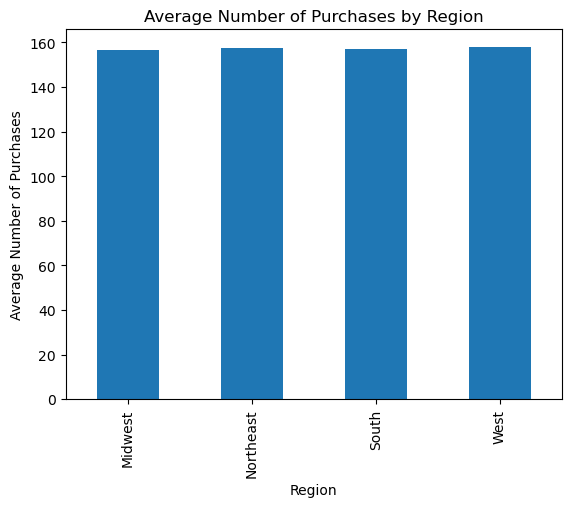

In [204]:
# Preview the bar chart.
avg_purchases_by_region.set_index('region', inplace=True)
avg_purchases_by_region.plot.bar(y='total_purchases', legend = False, xlabel = 'Region', ylabel = 'Average Number of Purchases', title = 'Average Number of Purchases by Region')

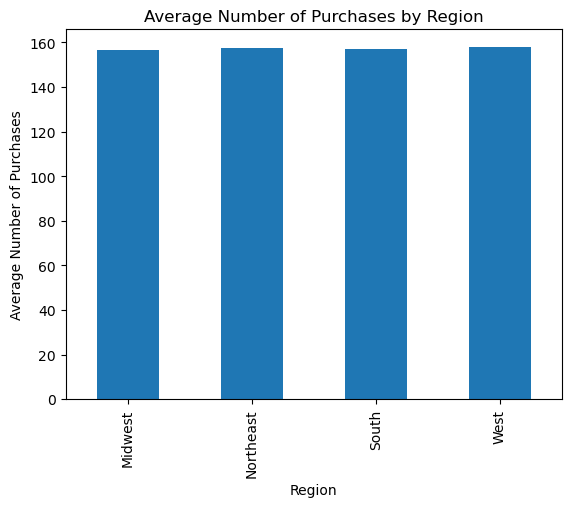

In [205]:
# Create the bar chart
bar_region_avg_purchases = avg_purchases_by_region.plot.bar(y='total_purchases', legend = False, xlabel = 'Region', ylabel = 'Average Number of Purchases', title = 'Average Number of Purchases by Region')

In [206]:
# Export plot as an image; Define the folder path and file name
folder_path = r'/Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/'
file_name = 'bar_region_avg_purchases.png'

# Validate folder
os.makedirs(folder_path, exist_ok=True)

# Create the full file path
file_path = os.path.join(folder_path, '04 Analysis', 'Visualizations', file_name)

# Export the plot to an image file
bar_region_avg_purchases.figure.savefig(file_path, bbox_inches='tight', dpi=300)
print(f'Plot exported to {file_path}')

Plot exported to /Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/04 Analysis/Visualizations/bar_region_avg_purchases.png


### 09. Age Group Analysis

In [207]:
# Group by user_id and calculate the total number of purchases for each user
user_purchases = df_merged.groupby('user_id').size().reset_index(name='total_purchases')

In [209]:
# Merge grouped data with profiling_age
user_age_group = df_merged[['user_id', 'profiling_age']].drop_duplicates()
merged_df = pd.merge(user_purchases, user_age_group, on='user_id')

In [210]:
# Calculate the average number of purchases for each region
avg_purchases_by_age_group = merged_df.groupby('profiling_age')['total_purchases'].mean().reset_index()

<Axes: title={'center': 'Average Number of Purchases by Age Group'}, xlabel='Age Group', ylabel='Average Number of Purchases'>

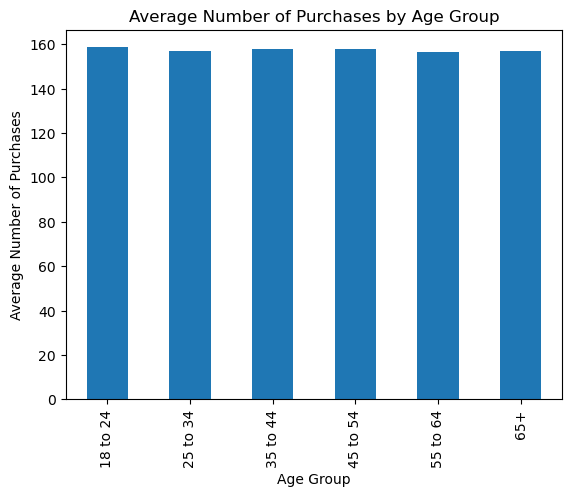

In [211]:
# Preview the bar chart.
avg_purchases_by_age_group.set_index('profiling_age', inplace=True)
avg_purchases_by_age_group.plot.bar(y='total_purchases', legend = False, xlabel = 'Age Group', ylabel = 'Average Number of Purchases', title = 'Average Number of Purchases by Age Group')

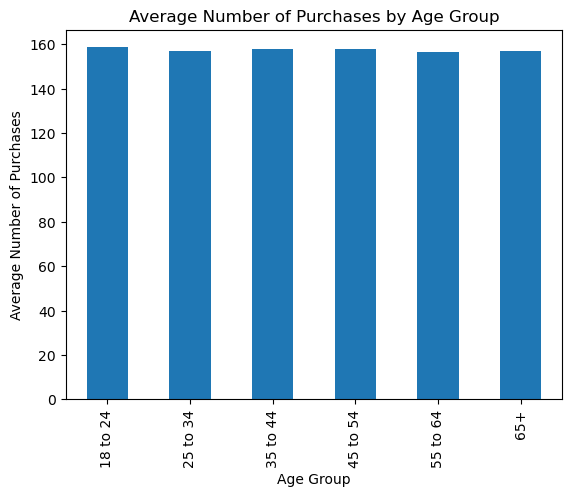

In [212]:
# Create the bar chart
bar_age_group_avg_purchases = avg_purchases_by_age_group.plot.bar(y='total_purchases', legend = False, xlabel = 'Age Group', ylabel = 'Average Number of Purchases', title = 'Average Number of Purchases by Age Group')

In [213]:
# Export plot as an image; Define the folder path and file name
folder_path = r'/Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/'
file_name = 'bar_age_group_avg_purchases.png'

# Validate folder
os.makedirs(folder_path, exist_ok=True)

# Create the full file path
file_path = os.path.join(folder_path, '04 Analysis', 'Visualizations', file_name)

# Export the plot to an image file
bar_age_group_avg_purchases.figure.savefig(file_path, bbox_inches='tight', dpi=300)
print(f'Plot exported to {file_path}')

Plot exported to /Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/04 Analysis/Visualizations/bar_age_group_avg_purchases.png


In [218]:
# Create a filter, DataFrame, crosstab, and then grouped bar chart
# Identify value counts of variable 'profiling_family_type'
family_type_counts = df_merged['profiling_family_type'].value_counts().nlargest(5).index

# Create a DataFrame of records
df_family_type_counts = df_merged[df_merged['profiling_family_type'].isin(family_type_counts)]

# Create a crosstab with variable 'profiling_income' as rows and variable 'profiling_family_type' as columns
ct_grouped_bar_chart = pd.crosstab(index=df_family_type_counts['profiling_age'], columns=df_family_type_counts['profiling_family_type'])
ct_grouped_bar_chart

profiling_family_type,Large family,Single,Small family,Standard family
profiling_age,,,,
18 to 24,1949502,864329,392300,370278
25 to 34,1260988,1294703,1222688,1280943
35 to 44,1255040,1258552,1293594,1259764
45 to 54,1307769,1255640,1290575,1262071
55 to 64,1262446,1309946,1233062,1228060
65+,2145945,2122175,2125617,2189072


In [219]:
# Set column order
column_order = ['Single', 'Small family', 'Standard family', 'Large family']
ct_grouped_bar_chart = ct_grouped_bar_chart[column_order]
ct_grouped_bar_chart

profiling_family_type,Single,Small family,Standard family,Large family
profiling_age,,,,
18 to 24,864329,392300,370278,1949502
25 to 34,1294703,1222688,1280943,1260988
35 to 44,1258552,1293594,1259764,1255040
45 to 54,1255640,1290575,1262071,1307769
55 to 64,1309946,1233062,1228060,1262446
65+,2122175,2125617,2189072,2145945


<Axes: title={'center': 'Age Group Orders by Family Type'}, xlabel='Age Groups', ylabel='Orders in Millions'>

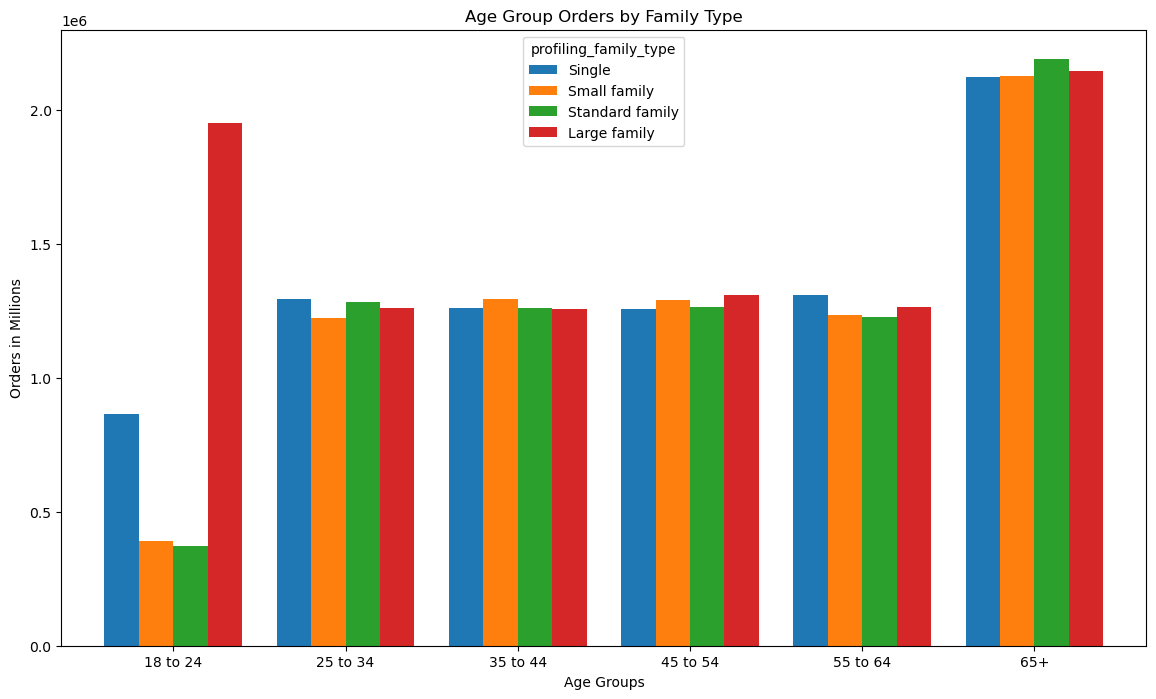

In [220]:
# Preview the grouped bar chart
ct_grouped_bar_chart.plot.bar(title = 'Age Group Orders by Family Type', xlabel = 'Age Groups', ylabel = 'Orders in Millions', rot=0, width=0.8, figsize=(14, 8))

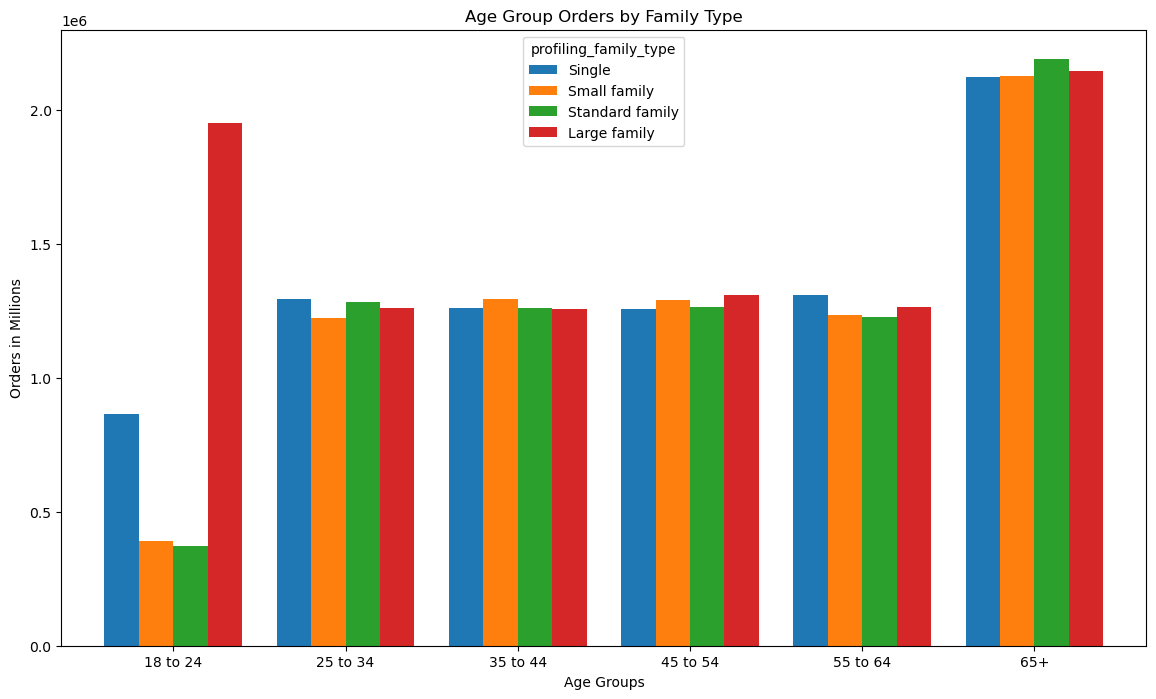

In [221]:
# Create the grouped bar chart
bar_grouped_age_family = ct_grouped_bar_chart.plot.bar(title = 'Age Group Orders by Family Type', xlabel = 'Age Groups', ylabel = 'Orders in Millions', rot=0, width=0.8, figsize=(14, 8))

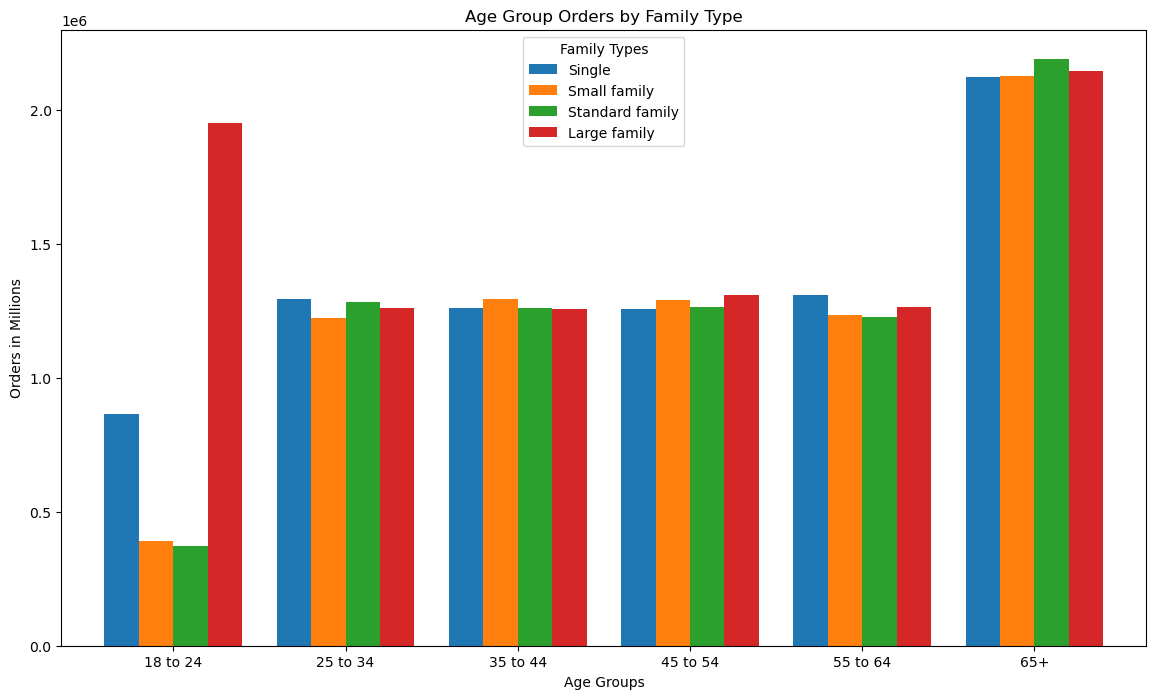

In [222]:
# Adjust the legend and labels
bar_grouped_age_family.legend(title='Family Types')
bar_grouped_age_family.figure

In [223]:
# Export plot as an image; Define the folder path and file name
folder_path = r'/Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/'
file_name = 'bar_grouped_age_family.png'

# Validate folder
os.makedirs(folder_path, exist_ok=True)

# Create the full file path
file_path = os.path.join(folder_path, '04 Analysis', 'Visualizations', file_name)

# Export the plot to an image file
bar_grouped_age_family.figure.savefig(file_path)

print(f'Plot exported to {file_path}')

Plot exported to /Users/bertpearce/Documents/Python Projects/2024.05.22 Instacard Basket Analysis/04 Analysis/Visualizations/bar_grouped_age_family.png
